*This notebook aims to further analyze my Scandinavian Defense games as white to better recognize common mistakes*

Import all necessary dependencies

In [12]:
import pandas as pd
import chess
import chess.pgn
import chess.polyglot
from io import StringIO
import chess.engine

Read in games data

In [13]:
chess_df = pd.read_csv('Datasets/all_games.csv')
chess_white_df = chess_df[chess_df['White Username'] == 'Tejas299']
white_df_B01 = chess_white_df[chess_white_df['Opening'] == 'B01']
white_df_B01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 343 to 656
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   White Username  31 non-null     object
 1   Black Username  31 non-null     object
 2   Time Control    31 non-null     int64 
 3   Game Result     31 non-null     object
 4   Date            31 non-null     object
 5   White Elo       31 non-null     int64 
 6   Black Elo       31 non-null     int64 
 7   Opening         31 non-null     object
 8   Moves           31 non-null     object
dtypes: int64(3), object(6)
memory usage: 2.4+ KB


Let's go through one game and use the stockfish engine to figure out my mistakes. The engine provides evaluations in either centipawns or moves to mate. A centipawn is equivalent to 0.01 pawns, so I look for positions where my move was at least a pawn worse than the engine's optimal move. This includes missed mating opportunities for me and allowed mating opportunities for my opponent.

In [14]:
game1 = white_df_B01.loc[343]
print(game1)

White Username                                             Tejas299
Black Username                                              Pabl0T3
Time Control                                                    300
Game Result                                                     0-1
Date                                                     2023.10.08
White Elo                                                       850
Black Elo                                                       846
Opening                                                         B01
Moves             1. e4 d5 2. d3 d4 3. Nf3 f6 4. Be2 e5 5. O-O B...
Name: 343, dtype: object


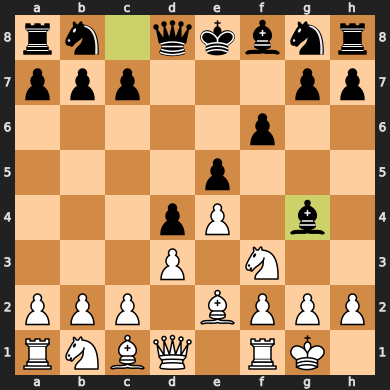

Your Move: f3d2
Best Move: f3d4


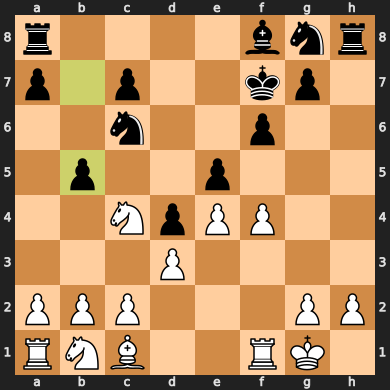

Your Move: c4d2
Best Move: c4a3


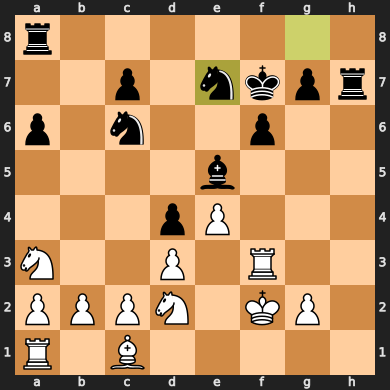

Your Move: c2c3
Best Move: a3c4


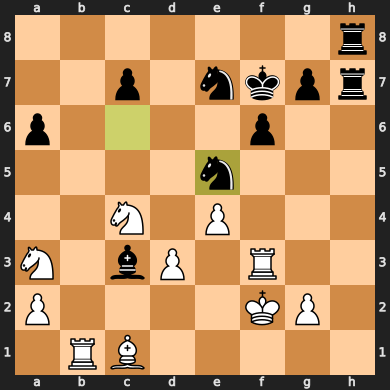

Your Move: f3g3
Best Move: c4e5


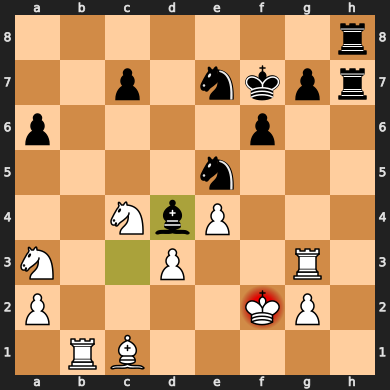

Your Move: c1e3
Best Move: f2e2


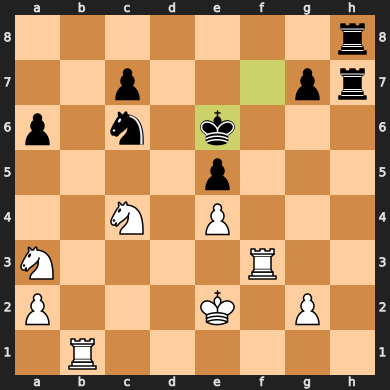

Your Move: b1f1
Best Move: f3g3


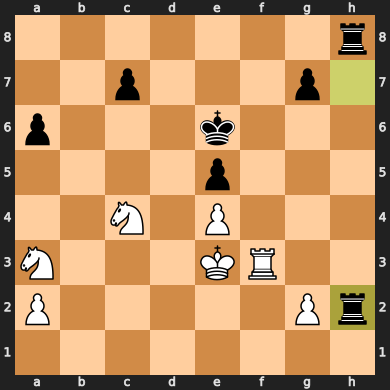

Your Move: g2g3
Best Move: f3g3


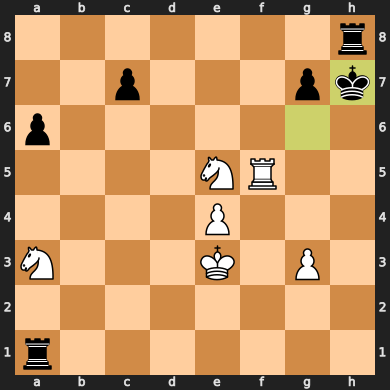

Your Move: f5h5
Best Move: a3c2


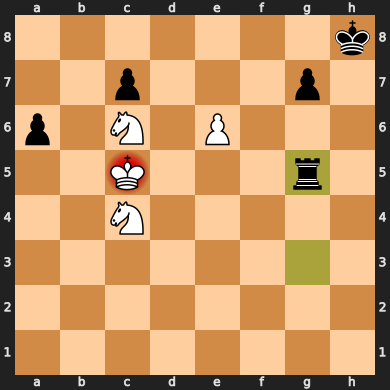

Your Move: c5b4
Best Move: c6e5


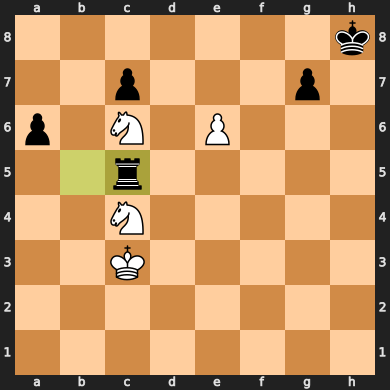

Your Move: c6a5
Best Move: e6e7


In [15]:
pgn = StringIO(game1['Moves'])
game = chess.pgn.read_game(pgn)
eval = 0
engine = chess.engine.SimpleEngine.popen_uci("Datasets/stockfish/stockfish-windows-x86-64-avx2")

board = chess.Board()

for number, move in enumerate(game.mainline_moves()): 
	
	board.push(move)
	info = engine.analyse(board, chess.engine.Limit(depth=20))

	score = info["score"].pov(chess.WHITE)
	if type(score) == chess.engine.Cp:
		new_eval = score.score()
	elif type(score) == chess.engine.Mate:
		# new_eval = figure out which direction the mate is in and set it to 10000 or -10000 accordingly
		mate_eval = score.mate()
		if mate_eval == None or mate_eval == 0:
			break
		elif mate_eval > 0:
			new_eval = 10000
		else:
			new_eval = -10000
	else:
		break
	if eval - new_eval >= 100 and number % 2 == 0:
		board.pop()
		info = engine.analyse(board, chess.engine.Limit(depth=20))
		display(board)
		print("Your Move:", move)
		print("Best Move:", info['pv'][0].uci())
		board.push(move)
	eval = new_eval

engine.quit()
	

Now let's go through all games and do the same

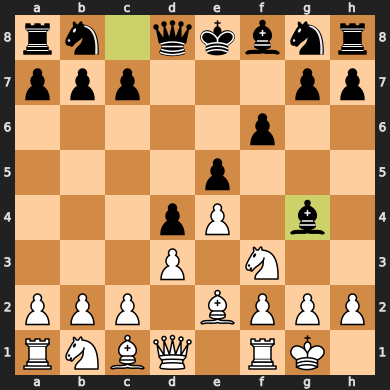

Your Move: f3d2
Best Move: f3d4


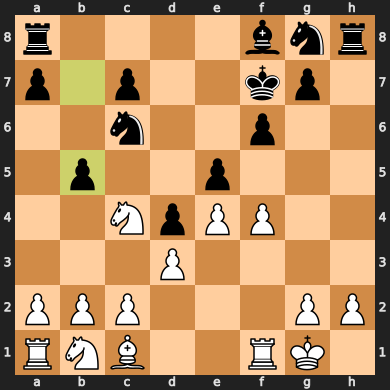

Your Move: c4d2
Best Move: c4a3


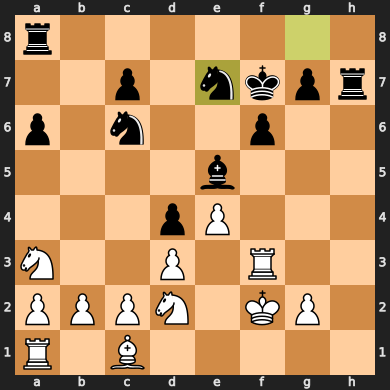

Your Move: c2c3
Best Move: a3c4


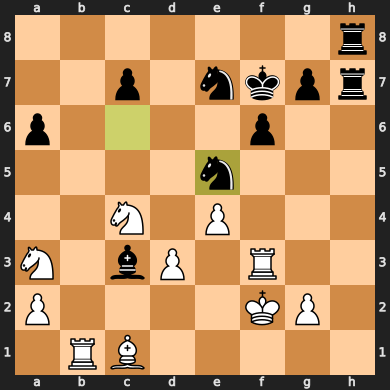

Your Move: f3g3
Best Move: c4e5


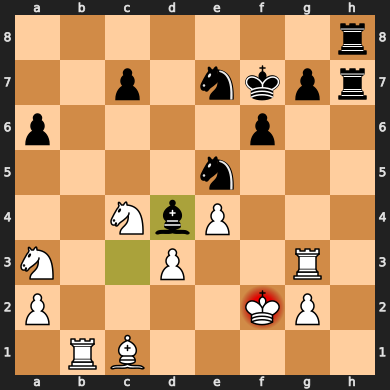

Your Move: c1e3
Best Move: f2e2


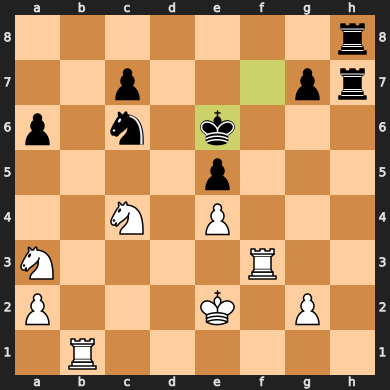

Your Move: b1f1
Best Move: f3g3


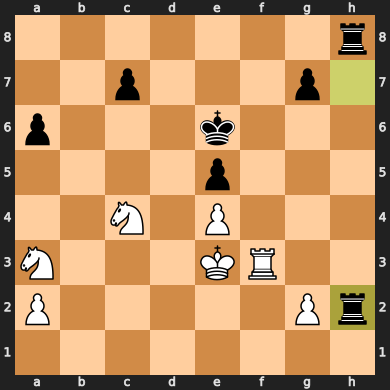

Your Move: g2g3
Best Move: f3g3


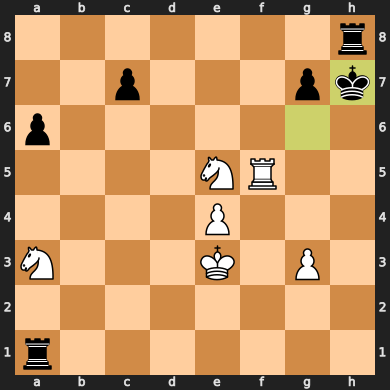

Your Move: f5h5
Best Move: a3c2


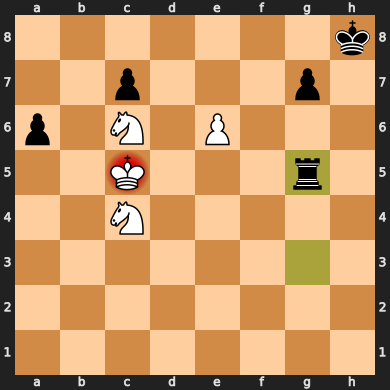

Your Move: c5b4
Best Move: c6e5


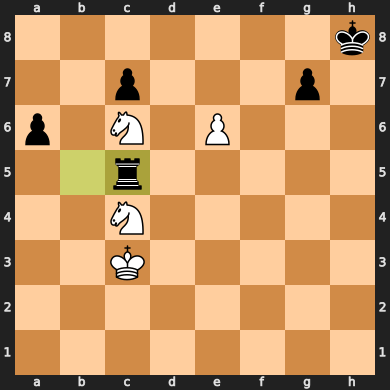

Your Move: c6a5
Best Move: e6e7


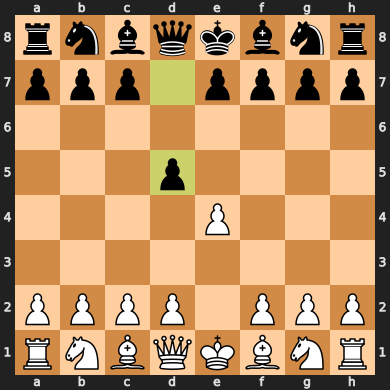

Your Move: f1d3
Best Move: e4d5


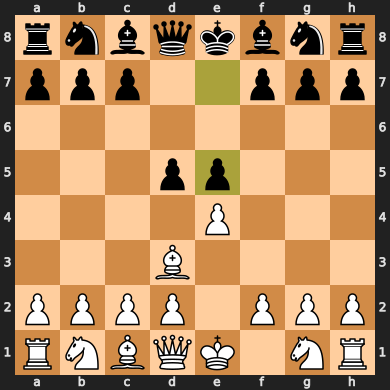

Your Move: g1f3
Best Move: e4d5


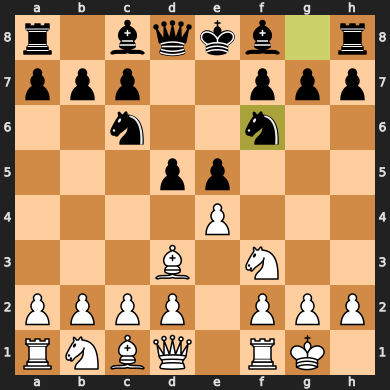

Your Move: f1e1
Best Move: e4d5


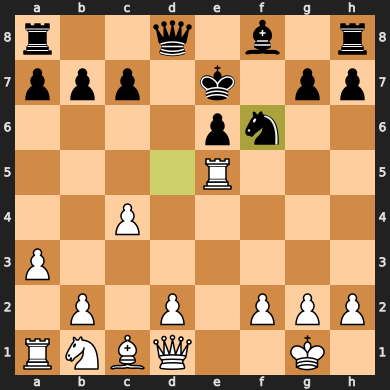

Your Move: d1e1
Best Move: d2d4


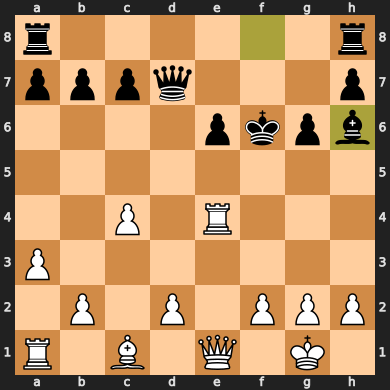

Your Move: g2g4
Best Move: d2d4


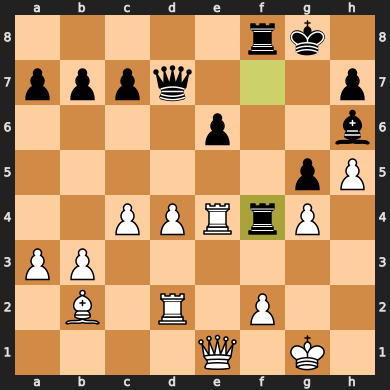

Your Move: d4d5
Best Move: e4f4


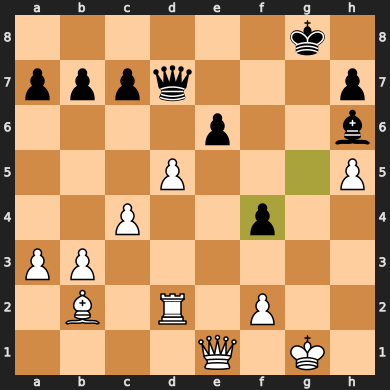

Your Move: d2e2
Best Move: d5e6


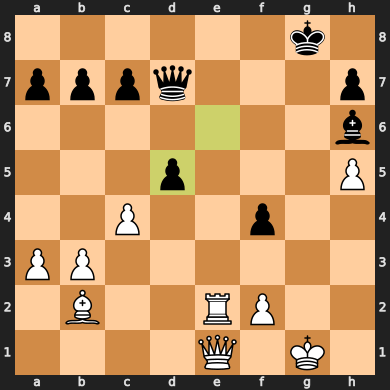

Your Move: e2e8
Best Move: f2f3


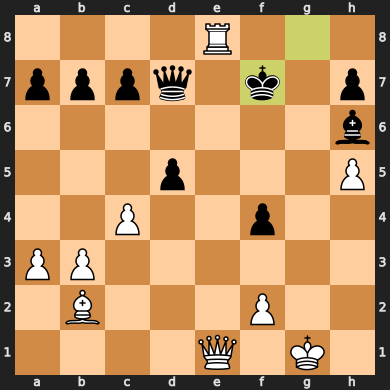

Your Move: e8e5
Best Move: e1e5


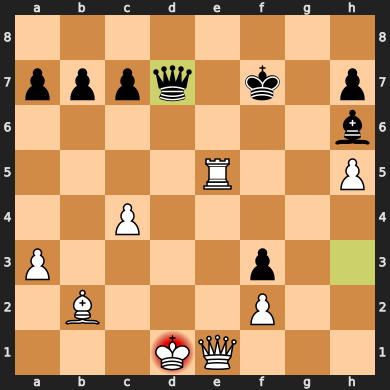

Your Move: e5d5
Best Move: d1c2


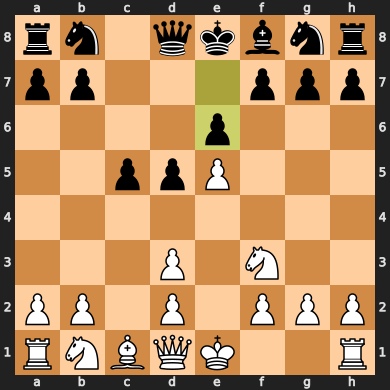

Your Move: e1g1
Best Move: d3d4


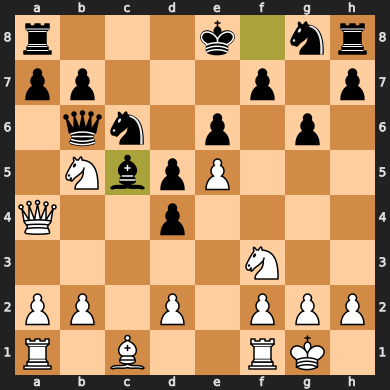

Your Move: b5d6
Best Move: b2b4


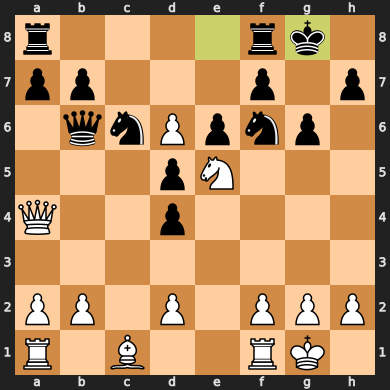

Your Move: d6d7
Best Move: e5c6


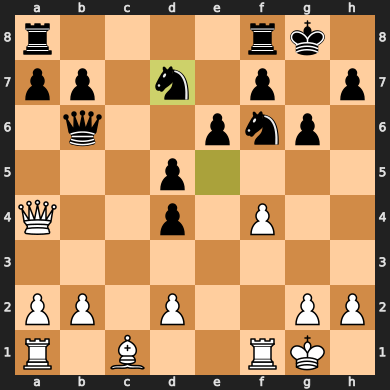

Your Move: g2g4
Best Move: d2d3


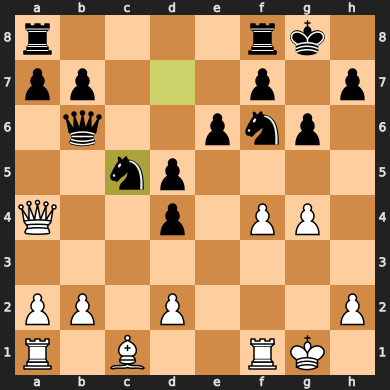

Your Move: a4c2
Best Move: a4d4


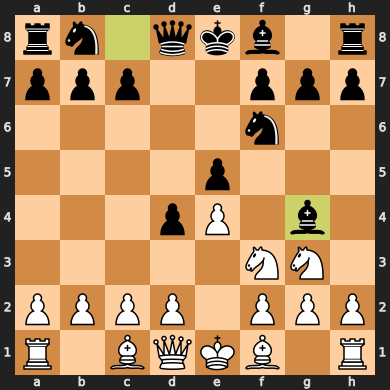

Your Move: f1e2
Best Move: h2h3


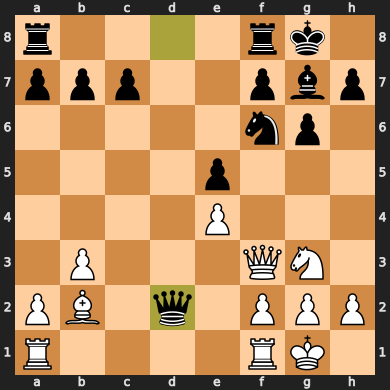

Your Move: f3e2
Best Move: b2e5


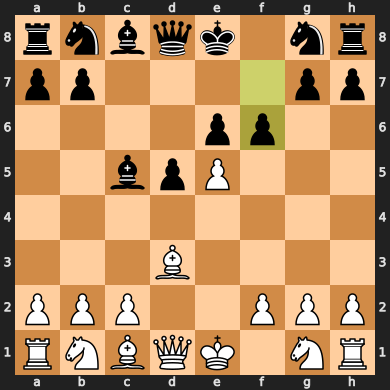

Your Move: g1f3
Best Move: d1h5


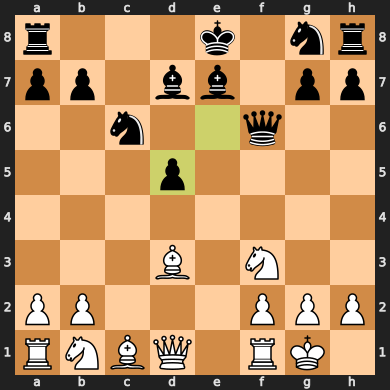

Your Move: d1b3
Best Move: b1c3


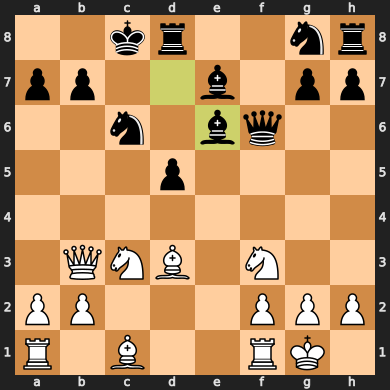

Your Move: d3b5
Best Move: f1e1


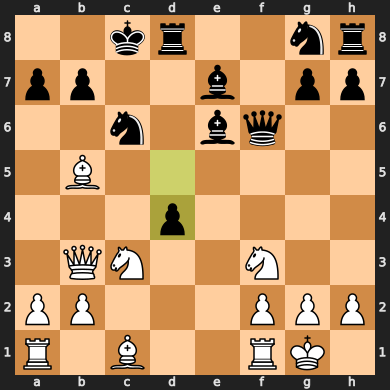

Your Move: c3e4
Best Move: b3a4


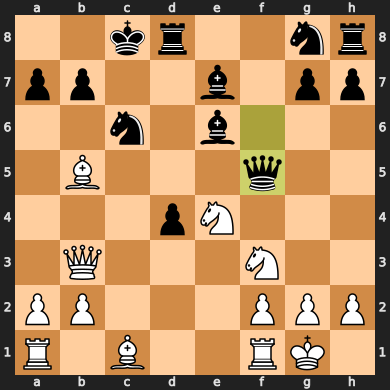

Your Move: f1e1
Best Move: b3a4


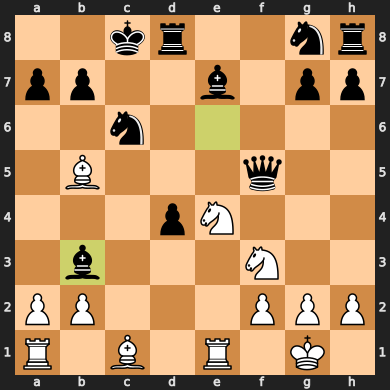

Your Move: a2b3
Best Move: b5c6


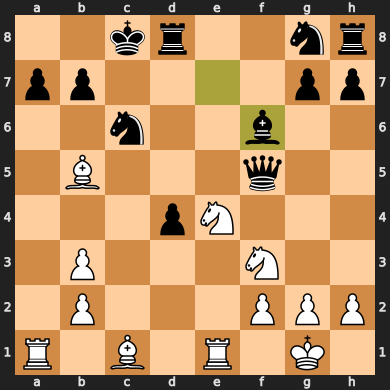

Your Move: e4d6
Best Move: b5c6


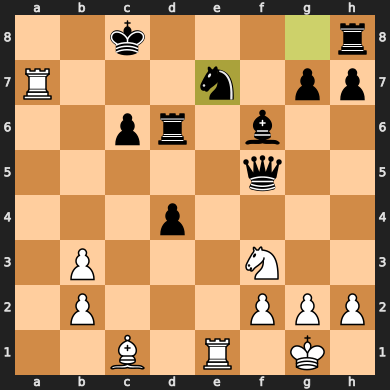

Your Move: a7e7
Best Move: a7a8


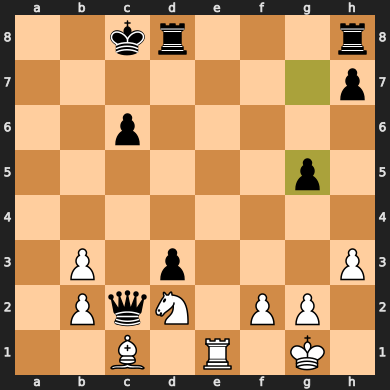

Your Move: g2g4
Best Move: e1f1


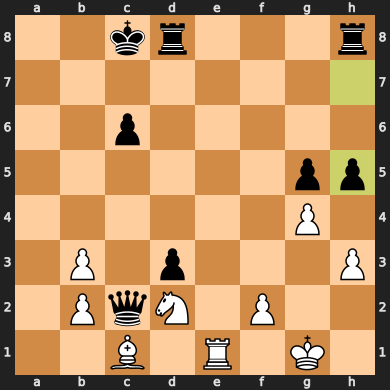

Your Move: f2f3
Best Move: g4h5


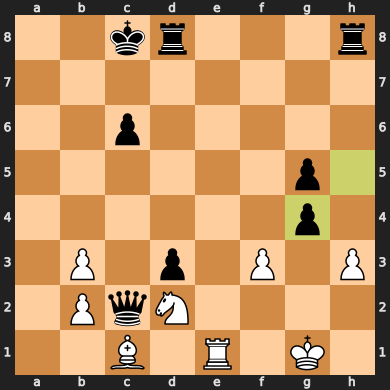

Your Move: h3g4
Best Move: d2c4


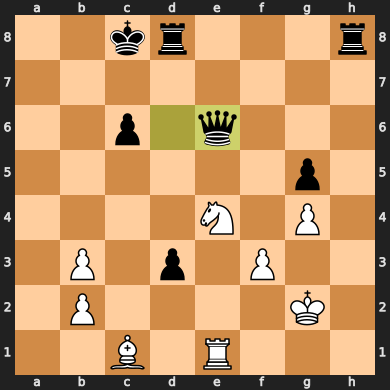

Your Move: c1g5
Best Move: c1e3


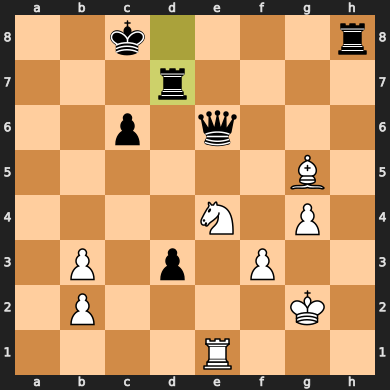

Your Move: g2g3
Best Move: e1a1


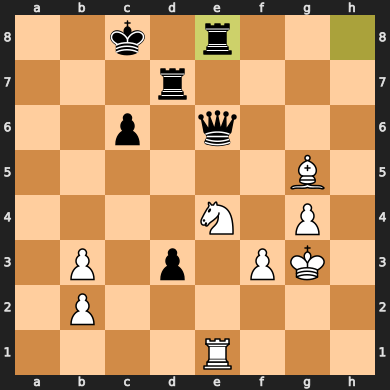

Your Move: e4c5
Best Move: g5d2


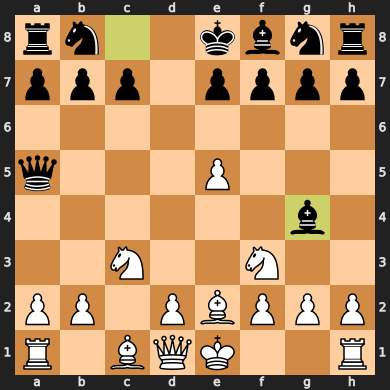

Your Move: e1g1
Best Move: b2b4


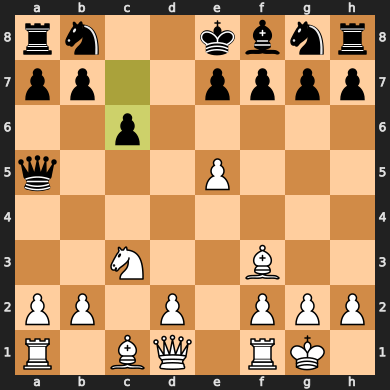

Your Move: f1e1
Best Move: e5e6


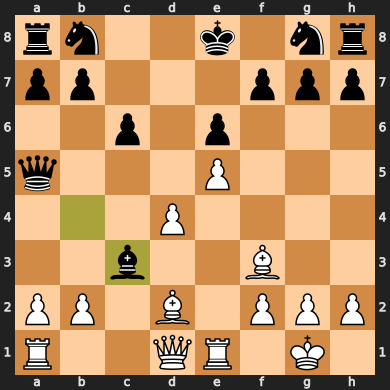

Your Move: d2c3
Best Move: b2c3


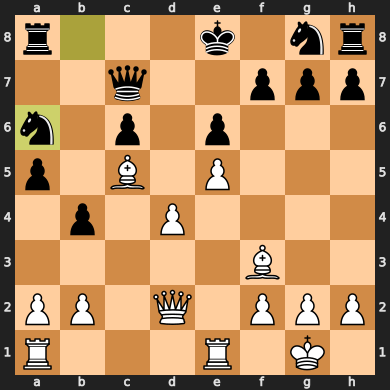

Your Move: a1d1
Best Move: c5d6


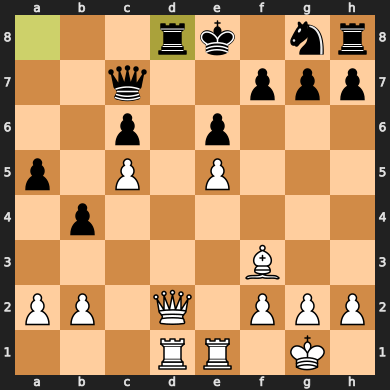

Your Move: d2d8
Best Move: f3c6


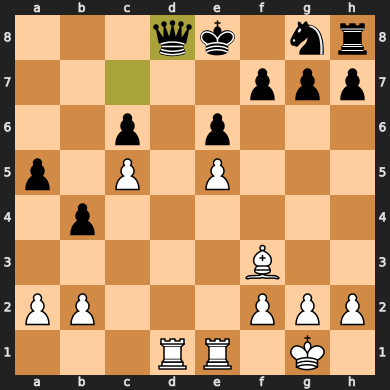

Your Move: d1d8
Best Move: f3c6


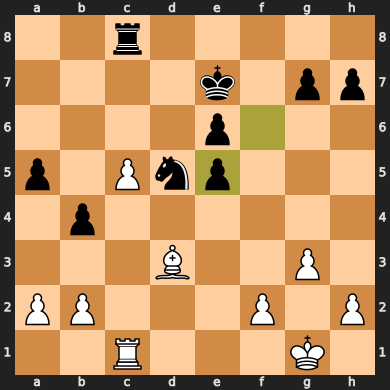

Your Move: c5c6
Best Move: d3h7


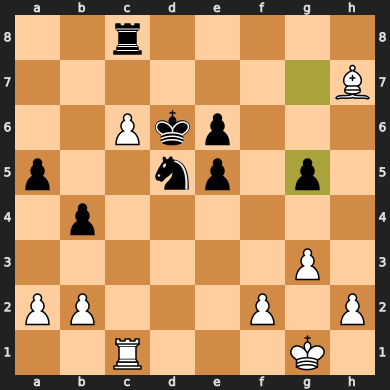

Your Move: h2h4
Best Move: g1g2


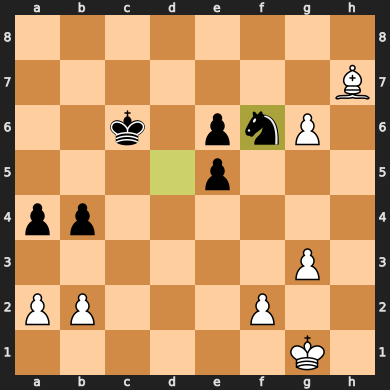

Your Move: f2f4
Best Move: g6g7


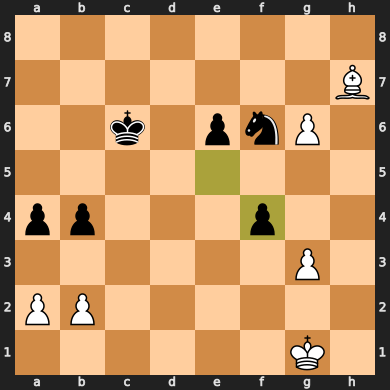

Your Move: g3f4
Best Move: g6g7


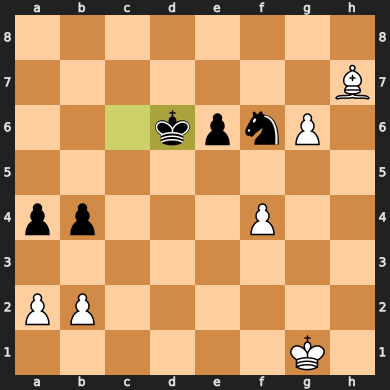

Your Move: g1f2
Best Move: g6g7


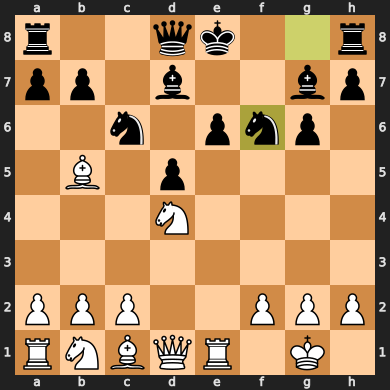

Your Move: c1g5
Best Move: d4e6


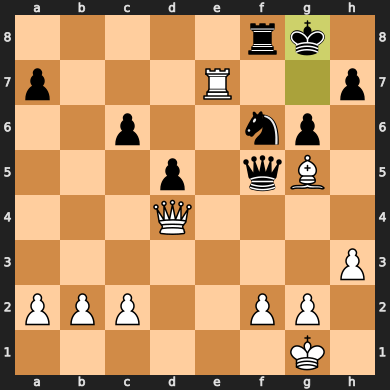

Your Move: e7a7
Best Move: g5h6


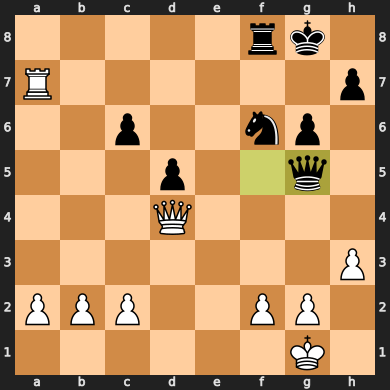

Your Move: d4c5
Best Move: a2a4


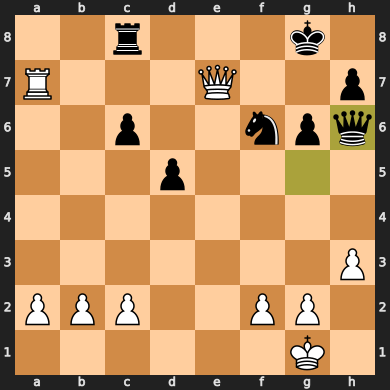

Your Move: e7f6
Best Move: e7e6


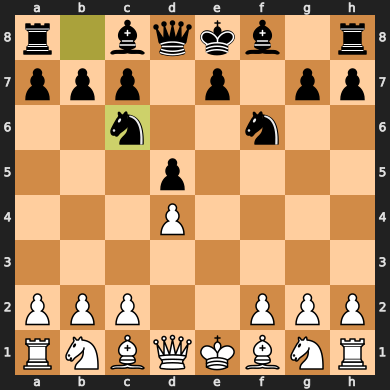

Your Move: c2c3
Best Move: f1b5


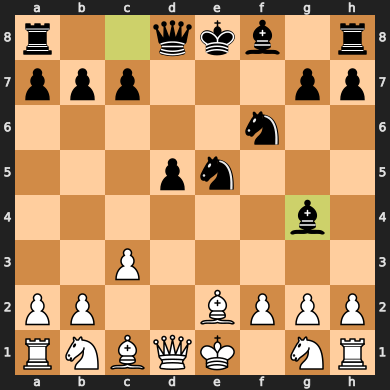

Your Move: g1f3
Best Move: f2f4


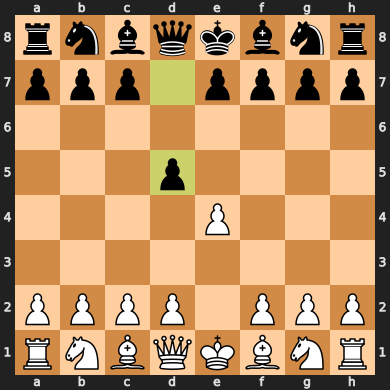

Your Move: b1c3
Best Move: e4d5


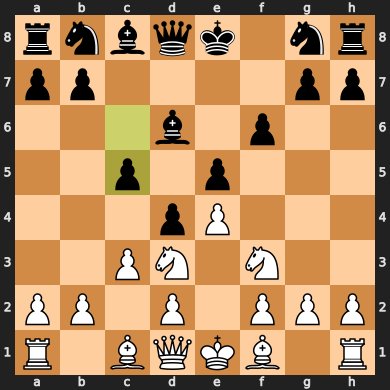

Your Move: c3d4
Best Move: b2b4


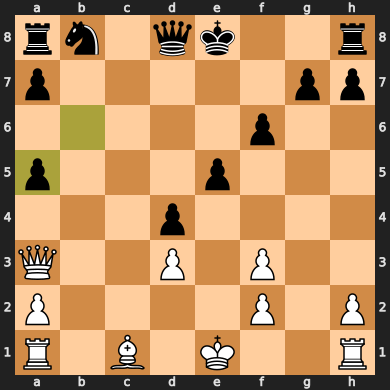

Your Move: a3a4
Best Move: c1d2


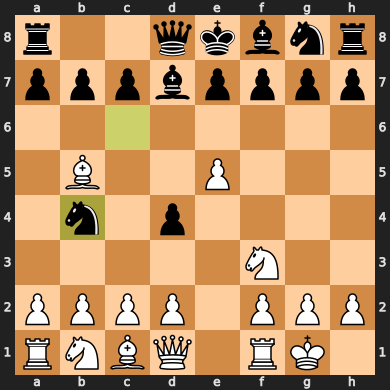

Your Move: b5d7
Best Move: f3d4


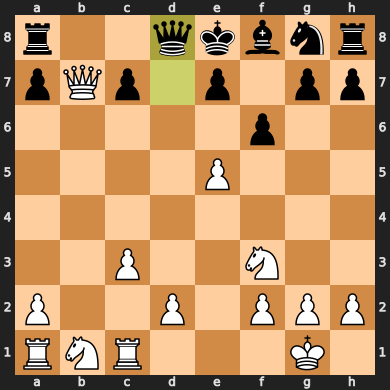

Your Move: d2d4
Best Move: b7c6


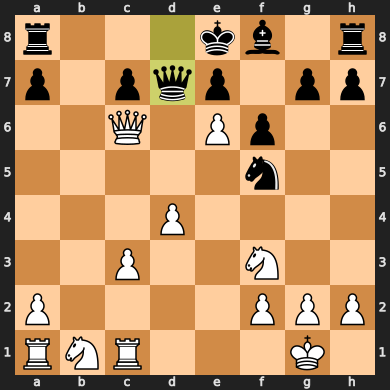

Your Move: e6d7
Best Move: c6d7


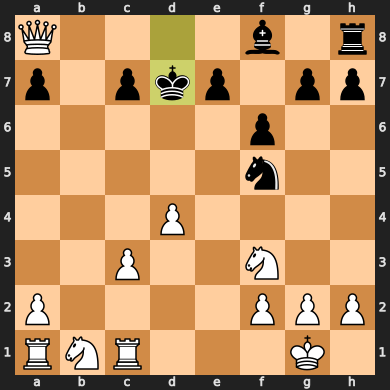

Your Move: a8d5
Best Move: a8d5


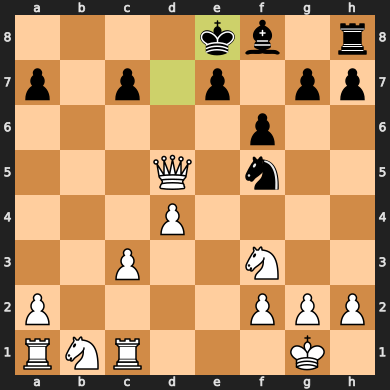

Your Move: d5f5
Best Move: b1a3


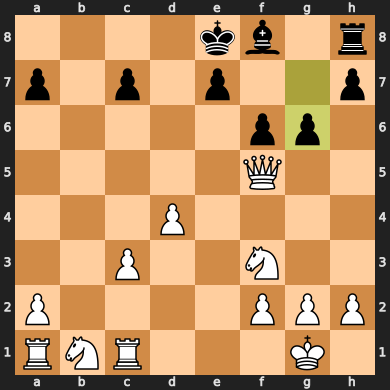

Your Move: f5b5
Best Move: f5e6


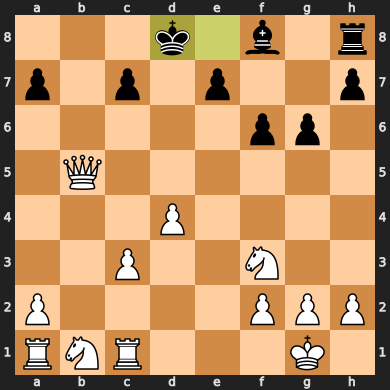

Your Move: b5b8
Best Move: b5d5


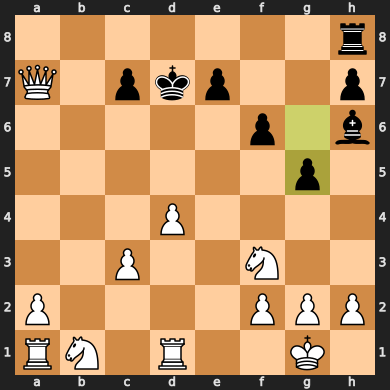

Your Move: c3c4
Best Move: a7a4


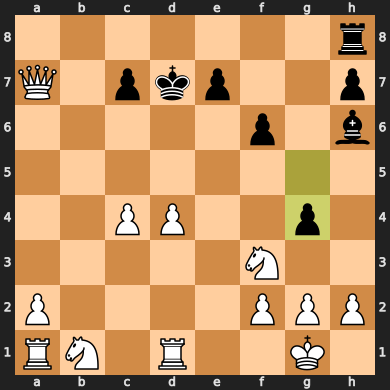

Your Move: f3h4
Best Move: d4d5


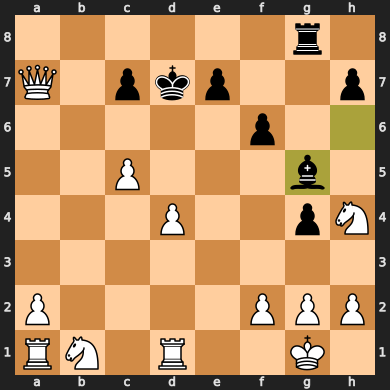

Your Move: g2g3
Best Move: a7a4


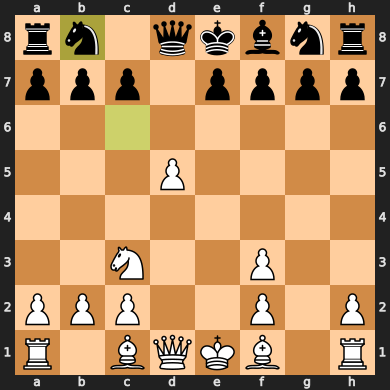

Your Move: f1b5
Best Move: d1e2


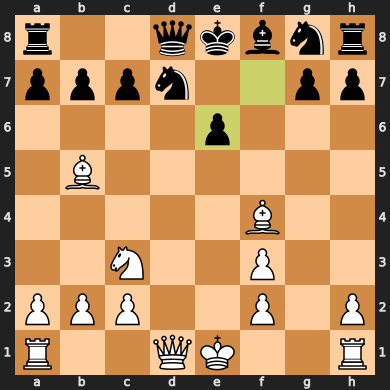

Your Move: f4g5
Best Move: d1e2


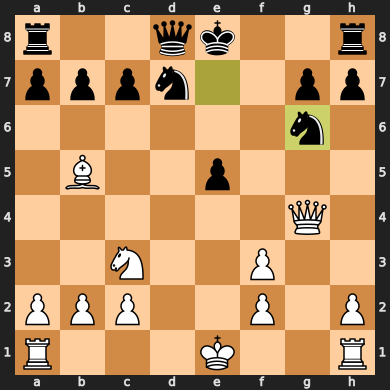

Your Move: a1d1
Best Move: g4e6


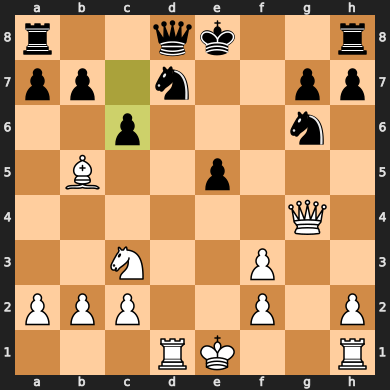

Your Move: b5c4
Best Move: b5d3


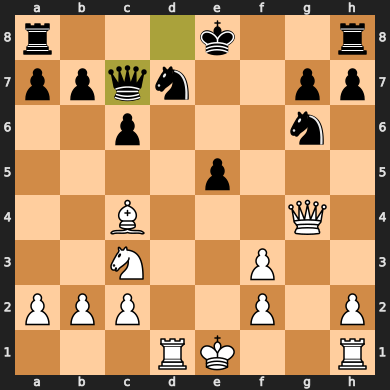

Your Move: c4e6
Best Move: c4f7


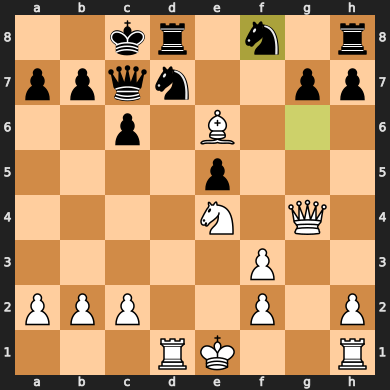

Your Move: g4g7
Best Move: e4d6


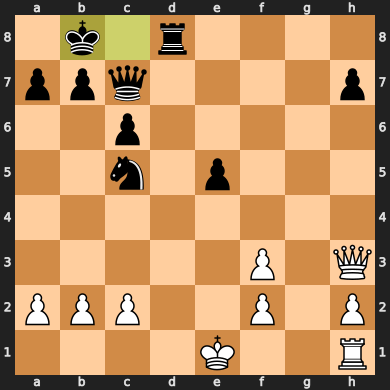

Your Move: h3h7
Best Move: h3h4


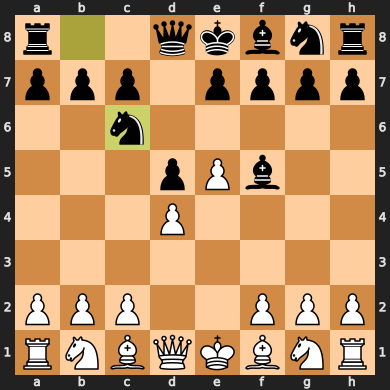

Your Move: f1d3
Best Move: c2c3


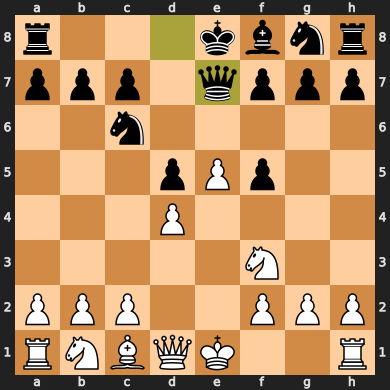

Your Move: c1g5
Best Move: e1g1


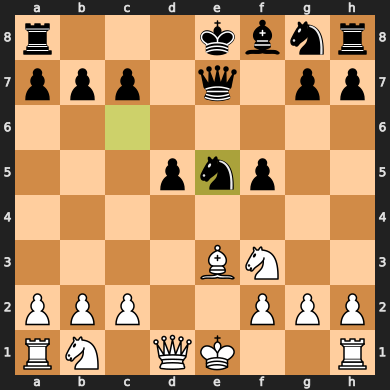

Your Move: f3e5
Best Move: d1d5


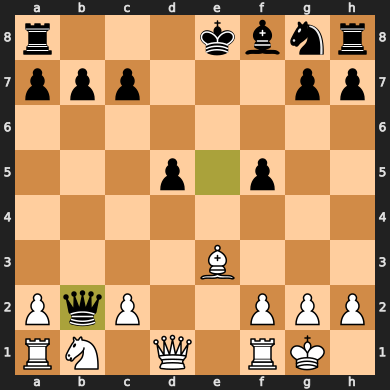

Your Move: b1d2
Best Move: e3d4


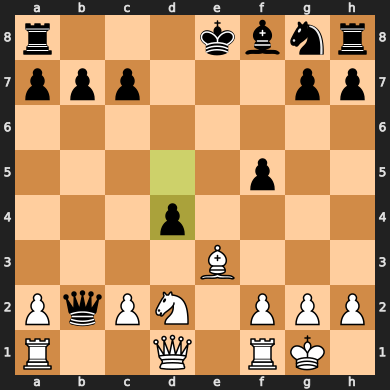

Your Move: d1h5
Best Move: e3g5


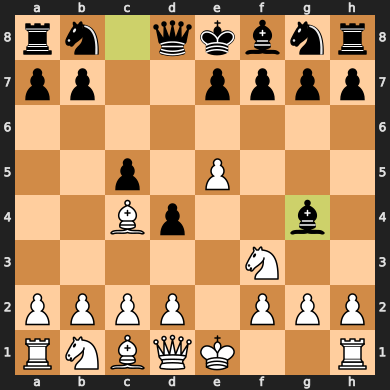

Your Move: e1g1
Best Move: c4f7


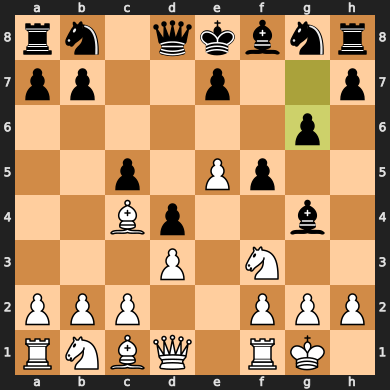

Your Move: c4d5
Best Move: b1d2


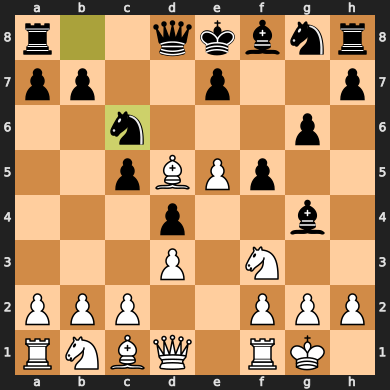

Your Move: e5e6
Best Move: d5c6


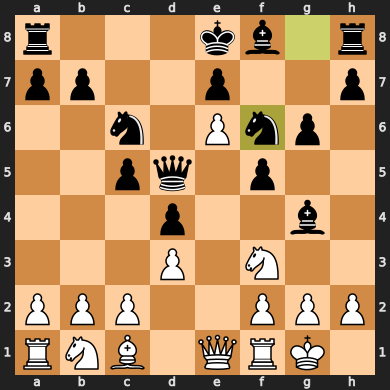

Your Move: c1f4
Best Move: c2c4


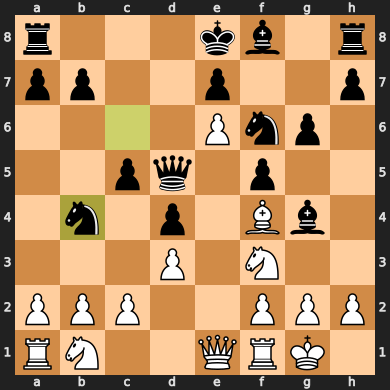

Your Move: e1e5
Best Move: c2c4


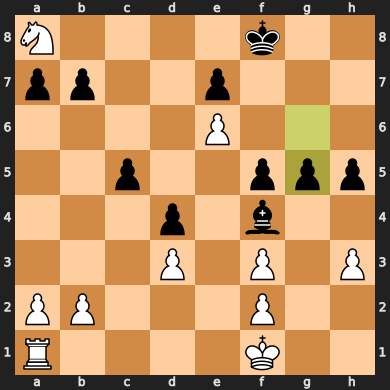

Your Move: a1c1
Best Move: b2b4


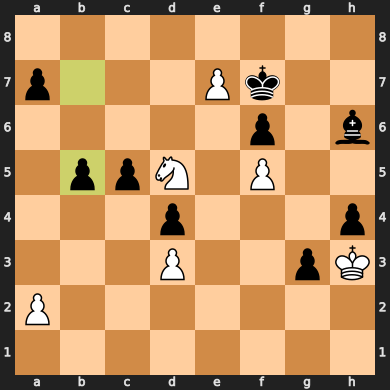

Your Move: h3h4
Best Move: e7e8q


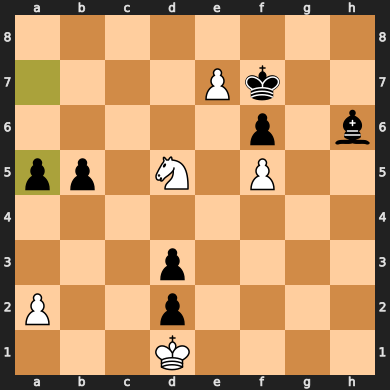

Your Move: a2a3
Best Move: d5f6


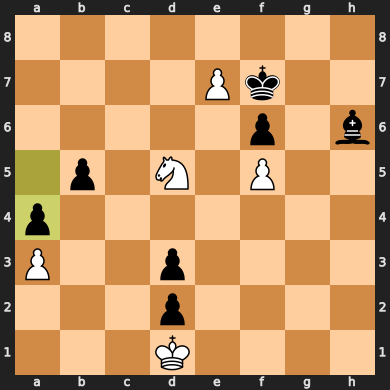

Your Move: d5b4
Best Move: d5c7


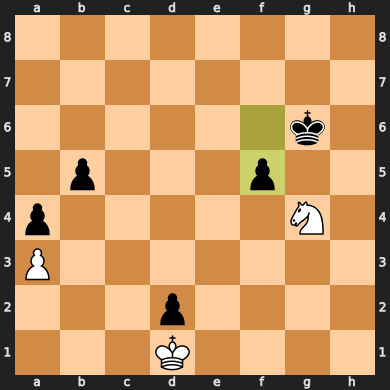

Your Move: g4e3
Best Move: g4e5


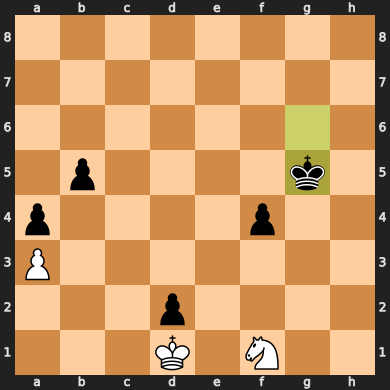

Your Move: d1d2
Best Move: f1d2


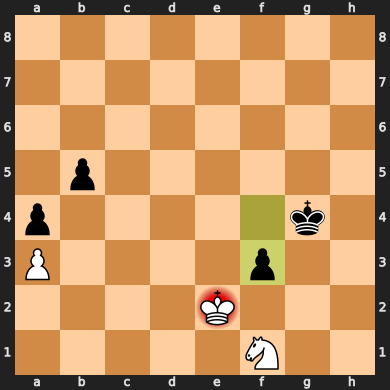

Your Move: e2f2
Best Move: e2d3


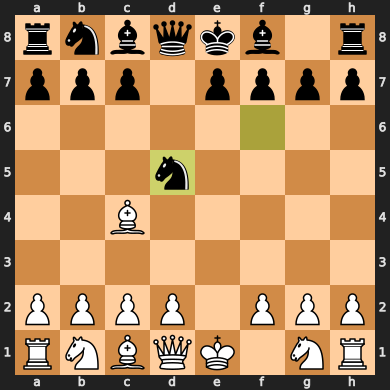

Your Move: c4d5
Best Move: d2d4


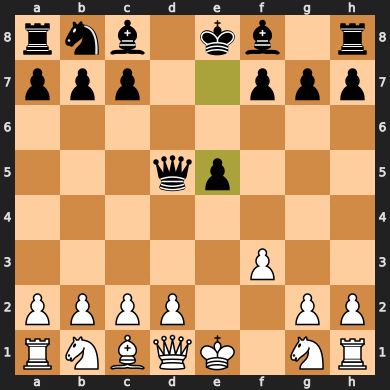

Your Move: g2g4
Best Move: b1c3


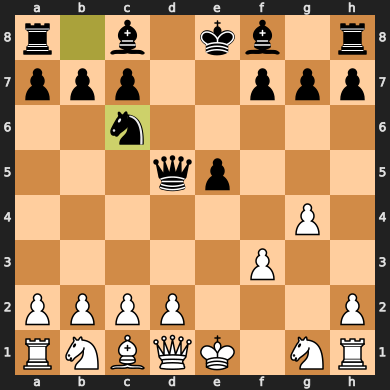

Your Move: g1h3
Best Move: b1c3


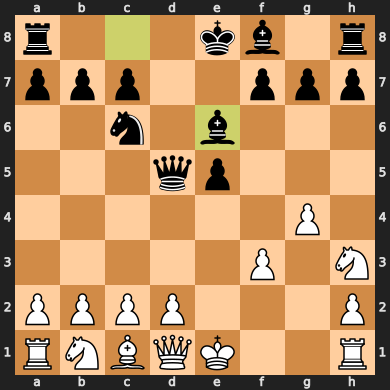

Your Move: h1f1
Best Move: h3g5


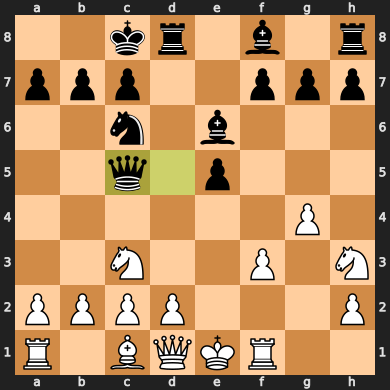

Your Move: a2a4
Best Move: h3g5


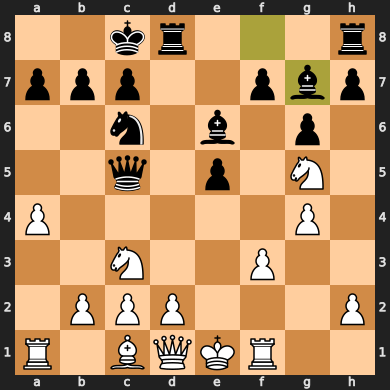

Your Move: c3e4
Best Move: g5e6


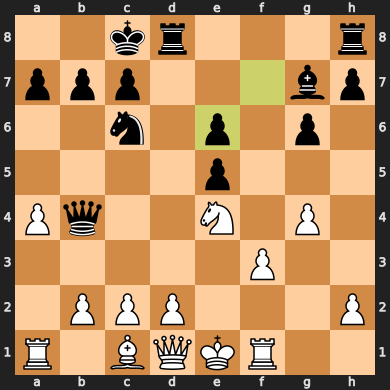

Your Move: e4g5
Best Move: c2c3


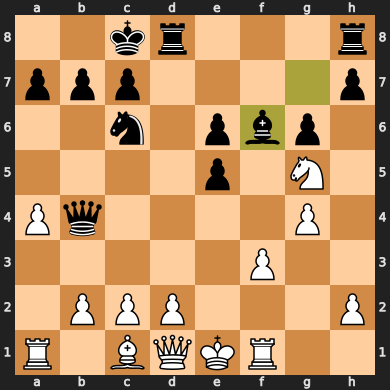

Your Move: g5f7
Best Move: c2c3


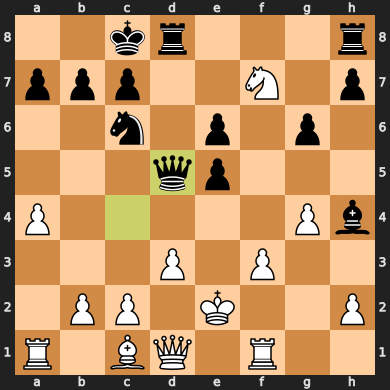

Your Move: c2c4
Best Move: c2c3


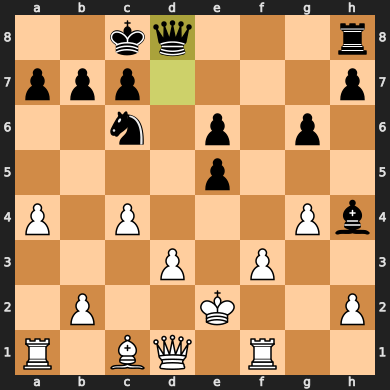

Your Move: b2b3
Best Move: e2d2


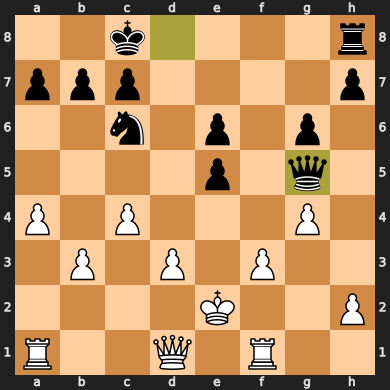

Your Move: a4a5
Best Move: e2f2


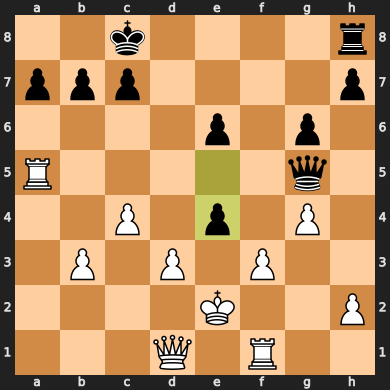

Your Move: d3e4
Best Move: a5g5


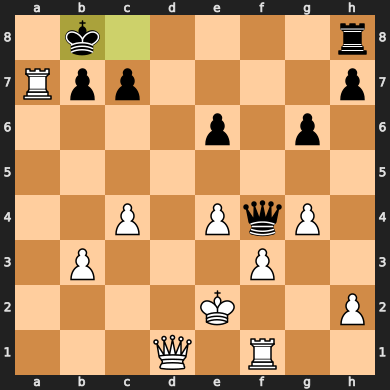

Your Move: a7a5
Best Move: d1a1


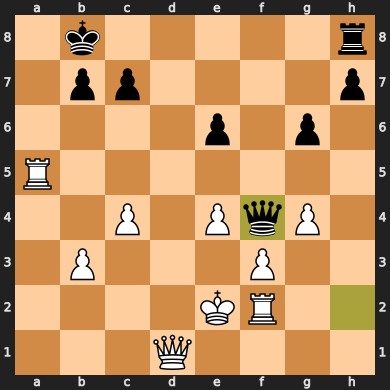

Your Move: e4e5
Best Move: d1a1


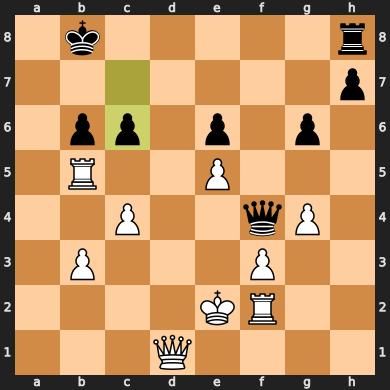

Your Move: b5b6
Best Move: d1d6


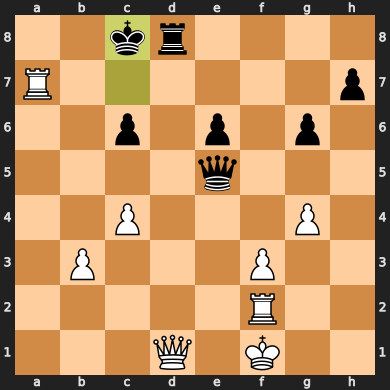

Your Move: f2d2
Best Move: a7a8


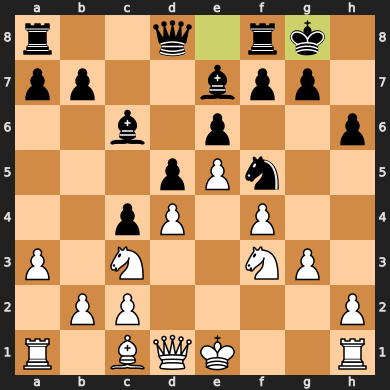

Your Move: b2b4
Best Move: h1g1


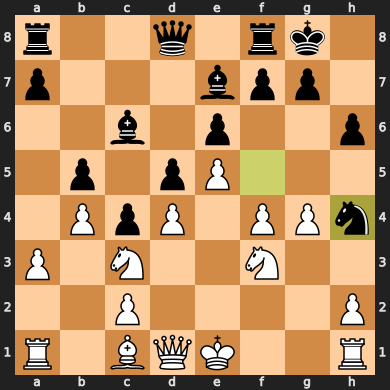

Your Move: f3h4
Best Move: g4g5


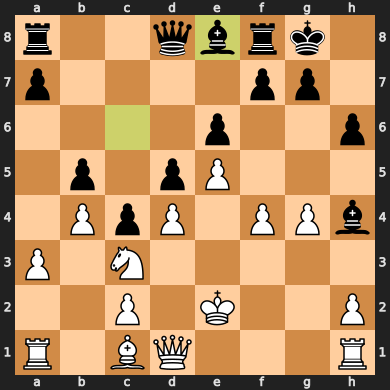

Your Move: g4g5
Best Move: c1e3


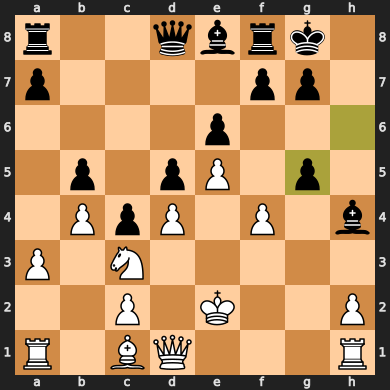

Your Move: f4g5
Best Move: d1g1


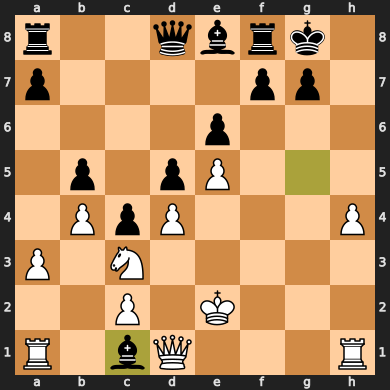

Your Move: a1c1
Best Move: d1c1


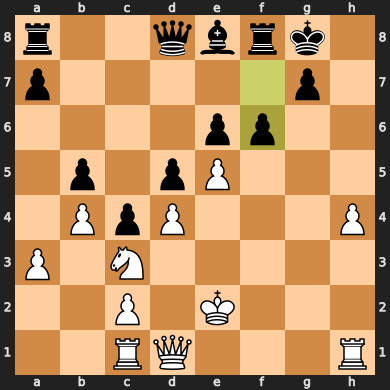

Your Move: e5f6
Best Move: d1g1


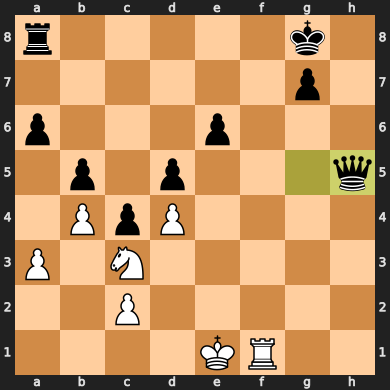

Your Move: a3a4
Best Move: c3e2


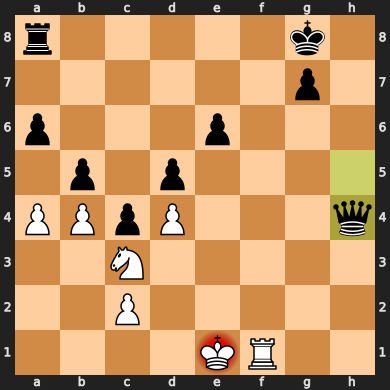

Your Move: e1d1
Best Move: e1e2


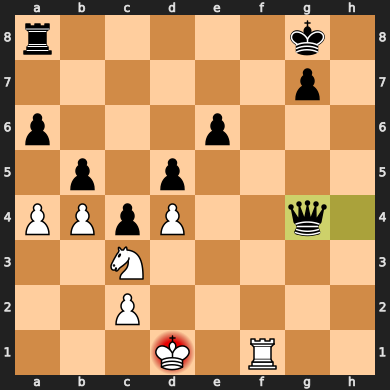

Your Move: c3e2
Best Move: d1e1


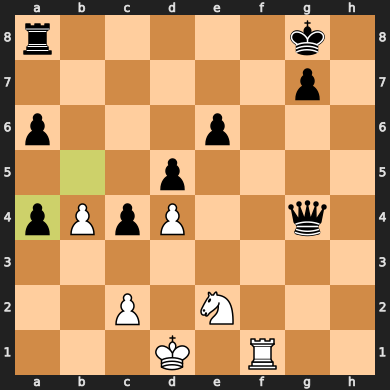

Your Move: b4b5
Best Move: f1g1


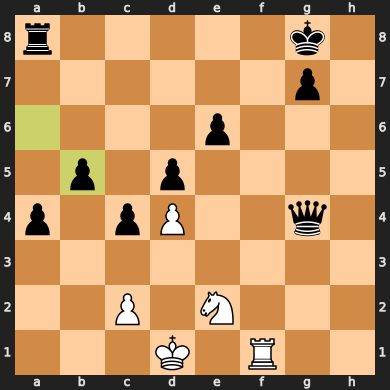

Your Move: f1f4
Best Move: f1g1


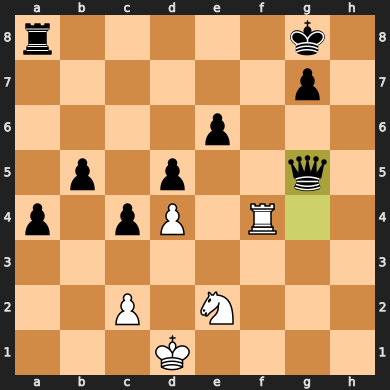

Your Move: c2c3
Best Move: f4f1


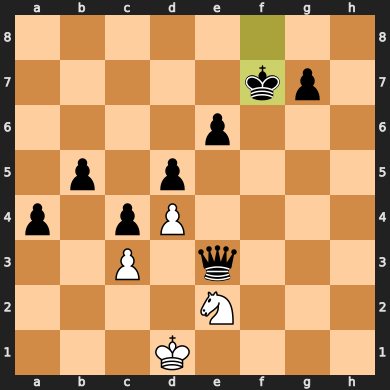

Your Move: d1e1
Best Move: e2c1


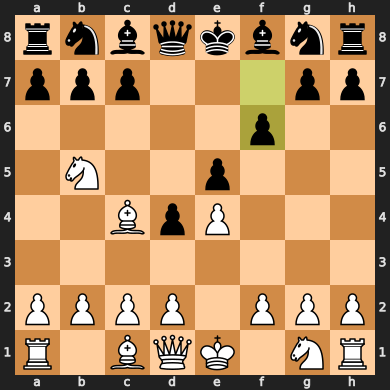

Your Move: g2g4
Best Move: a2a4


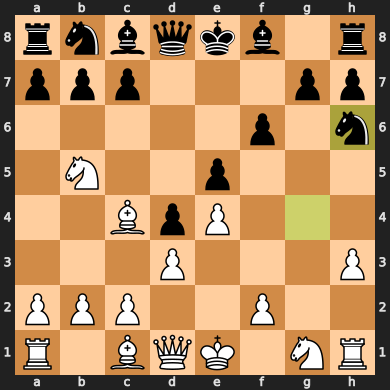

Your Move: d1h5
Best Move: c1h6


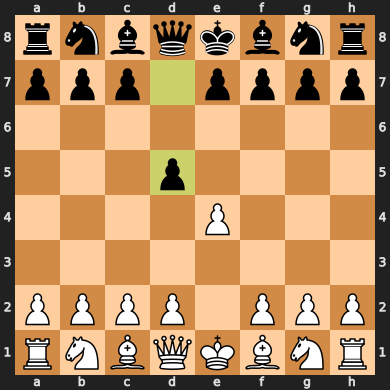

Your Move: b1c3
Best Move: e4d5


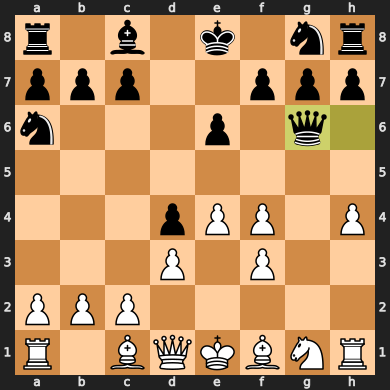

Your Move: f4f5
Best Move: g1e2


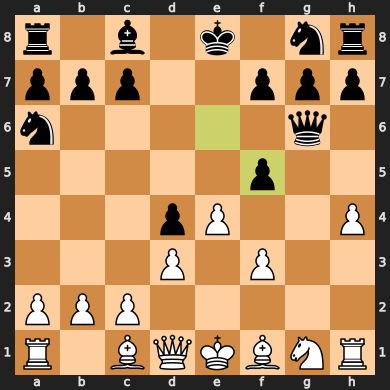

Your Move: e4f5
Best Move: g1e2


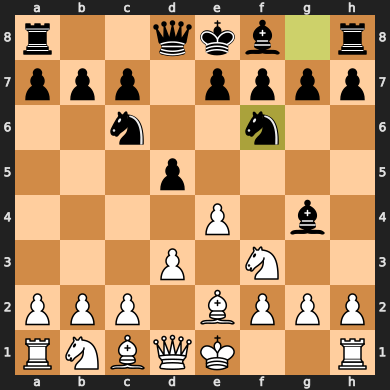

Your Move: g2g3
Best Move: b1d2


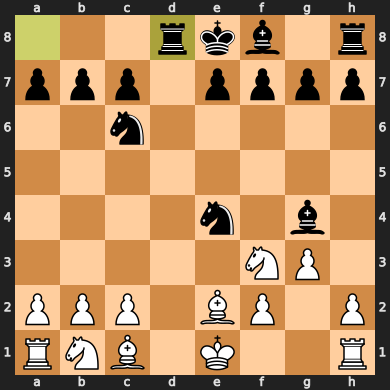

Your Move: f3e5
Best Move: c1e3


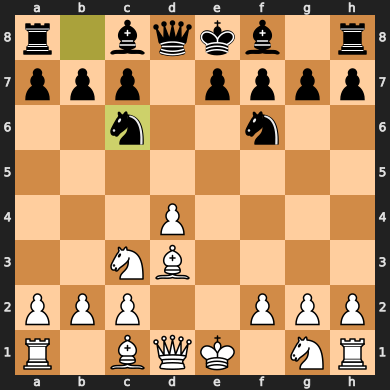

Your Move: d3e2
Best Move: g1f3


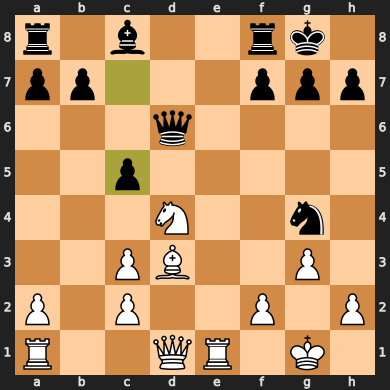

Your Move: d4f5
Best Move: d4e6


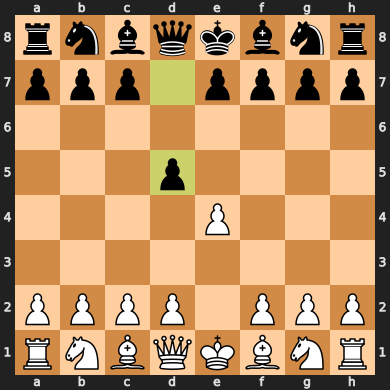

Your Move: b1c3
Best Move: e4d5


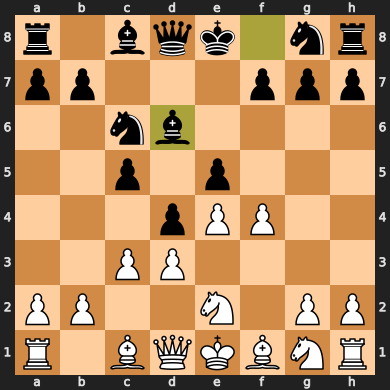

Your Move: c3c4
Best Move: g1f3


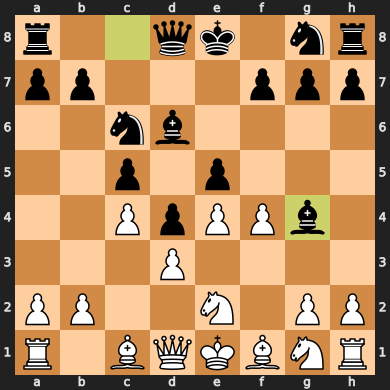

Your Move: g1f3
Best Move: f4f5


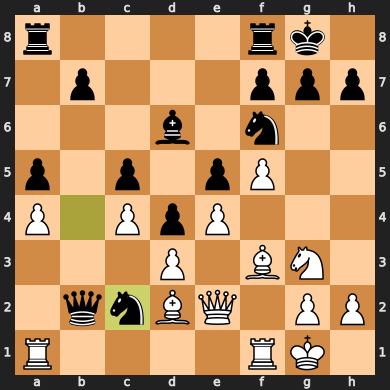

Your Move: a1b1
Best Move: f1b1


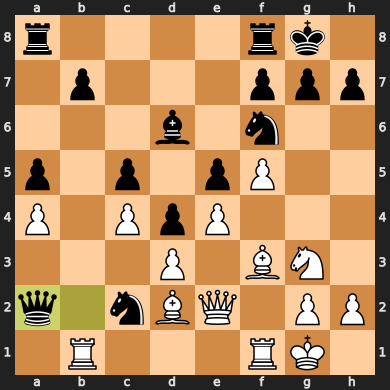

Your Move: b1b7
Best Move: f1c1


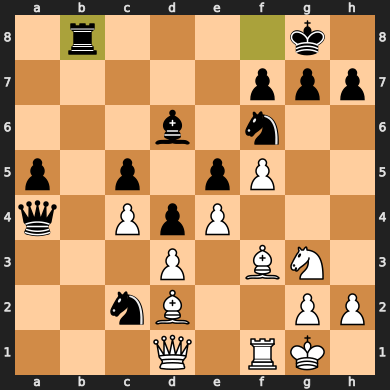

Your Move: g3h5
Best Move: f1f2


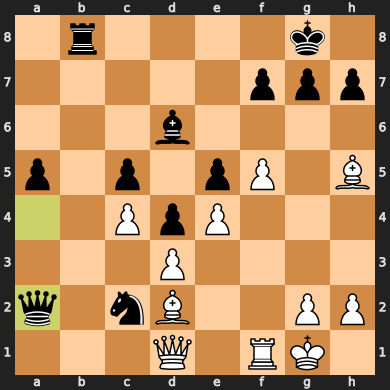

Your Move: h2h3
Best Move: h5f7


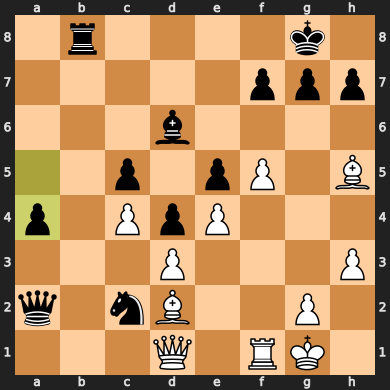

Your Move: f5f6
Best Move: h5f7


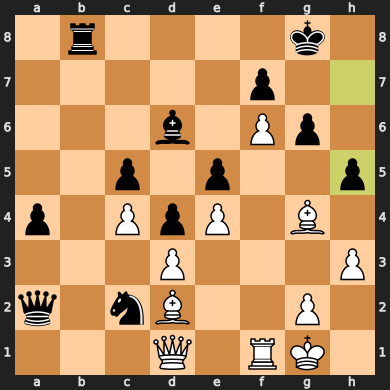

Your Move: g4f3
Best Move: g4h5


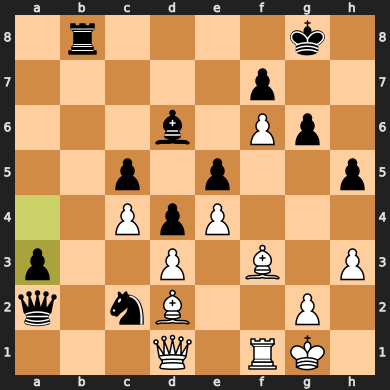

Your Move: g2g4
Best Move: g1h2


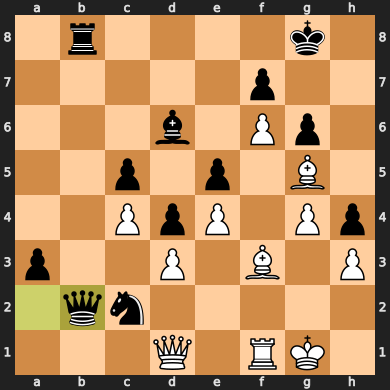

Your Move: g5h4
Best Move: f1f2


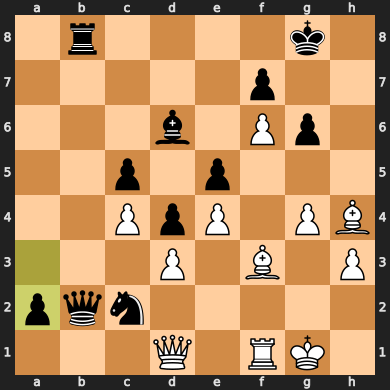

Your Move: d1d2
Best Move: h4f2


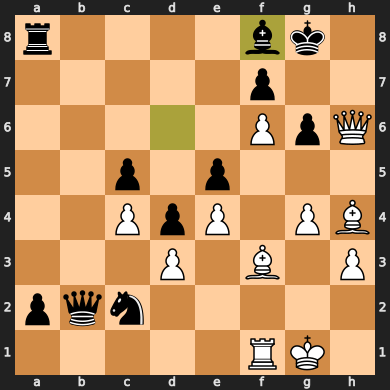

Your Move: h6g6
Best Move: h6d2


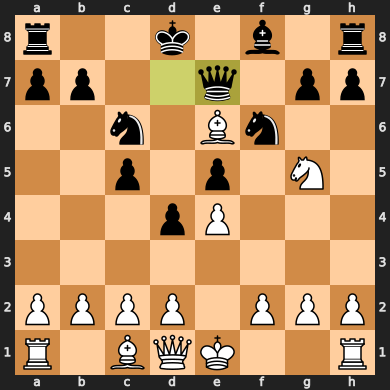

Your Move: g5f7
Best Move: d2d3


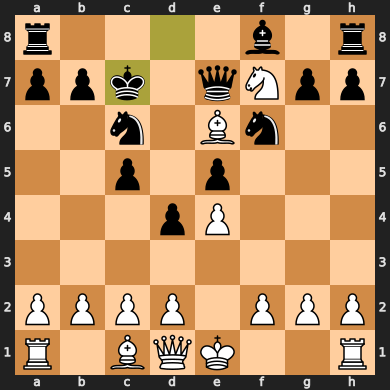

Your Move: f7h8
Best Move: e6b3


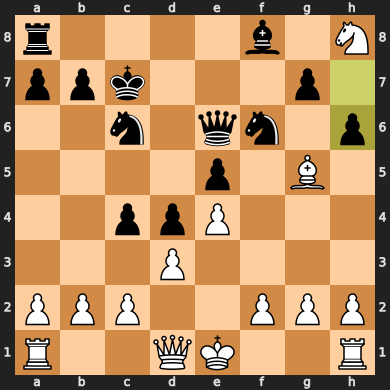

Your Move: g5f6
Best Move: g5d2


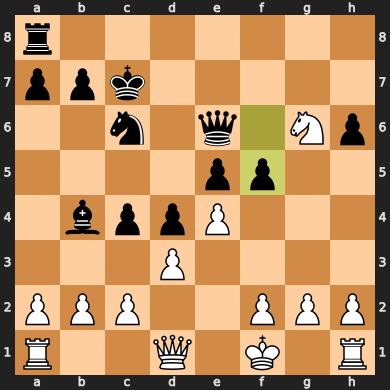

Your Move: d1h5
Best Move: e4f5


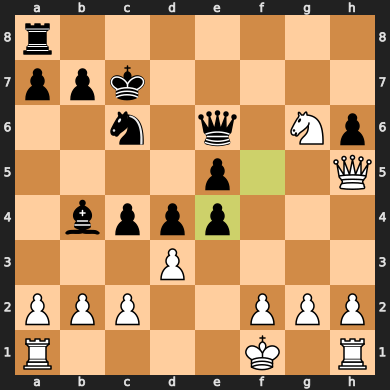

Your Move: h5h6
Best Move: d3e4


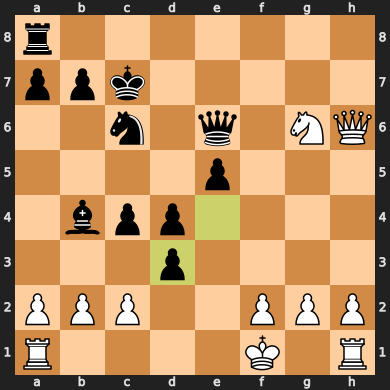

Your Move: h6g7
Best Move: c2d3


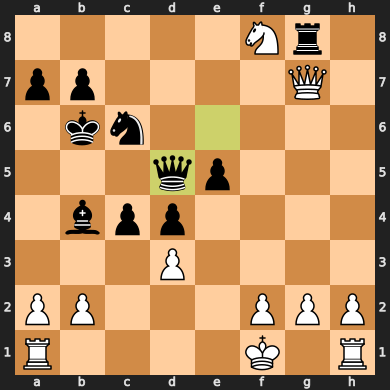

Your Move: g7f6
Best Move: f8d7


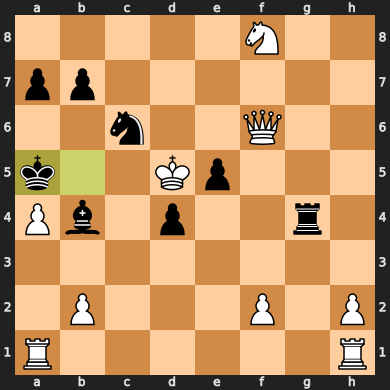

Your Move: b2b3
Best Move: f6f7


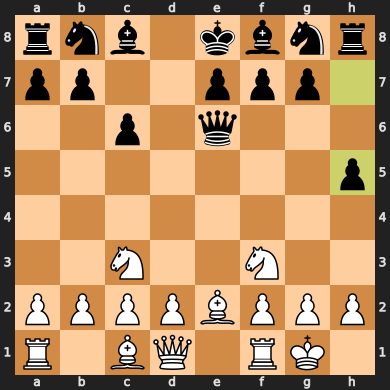

Your Move: f3d4
Best Move: d2d4


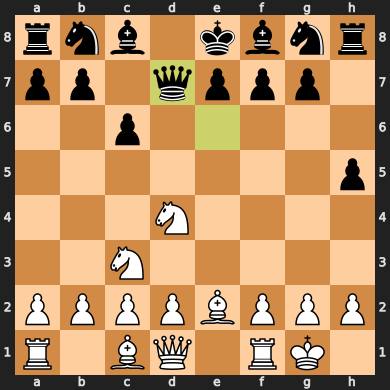

Your Move: e2h5
Best Move: d4f3


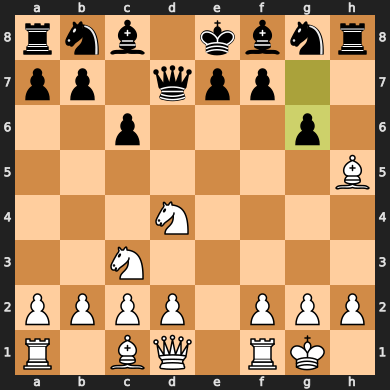

Your Move: h5g4
Best Move: h5g6


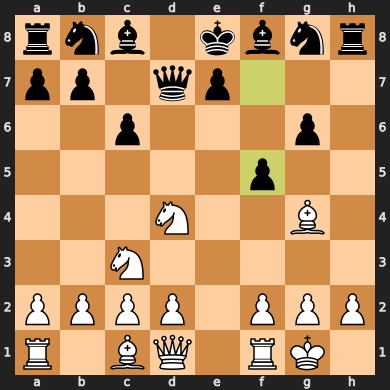

Your Move: g4f3
Best Move: d4f5


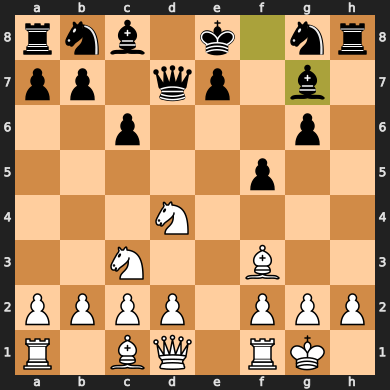

Your Move: f1e1
Best Move: d4b3


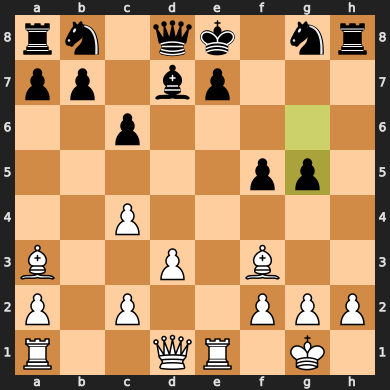

Your Move: a1b1
Best Move: d1d2


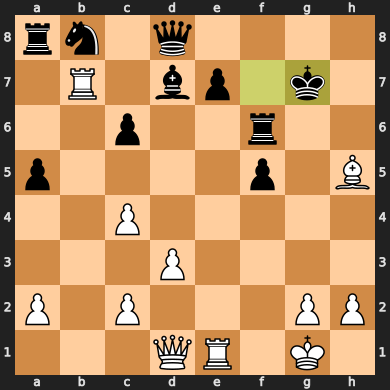

Your Move: h2h3
Best Move: d1d2


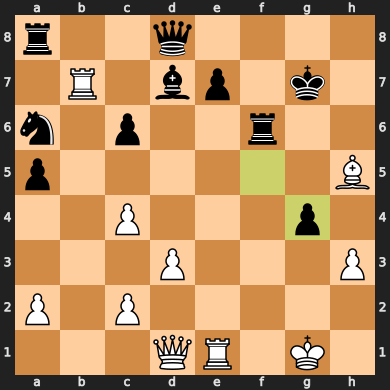

Your Move: h3g4
Best Move: d1d2


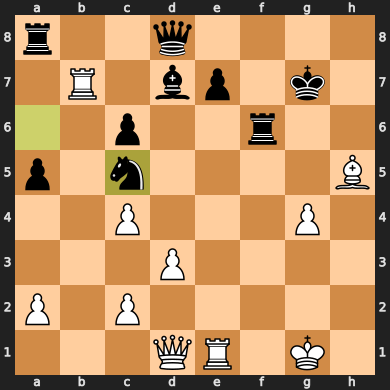

Your Move: g4g5
Best Move: d1a1


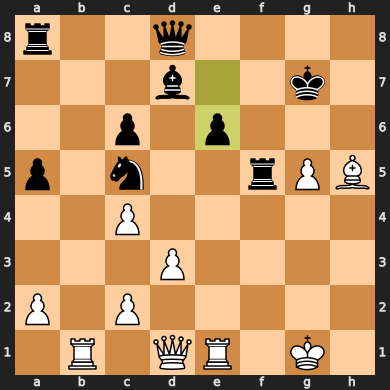

Your Move: g5g6
Best Move: e1e2


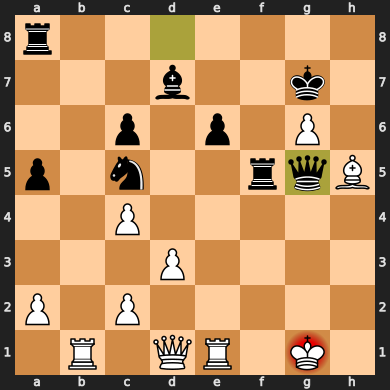

Your Move: g1h2
Best Move: d1g4


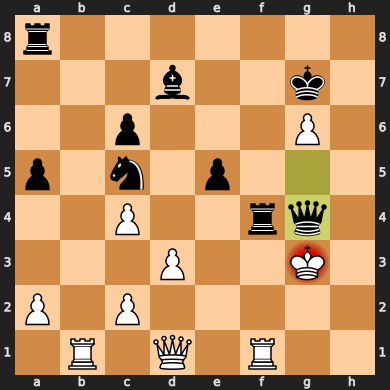

Your Move: g3h2
Best Move: d1g4


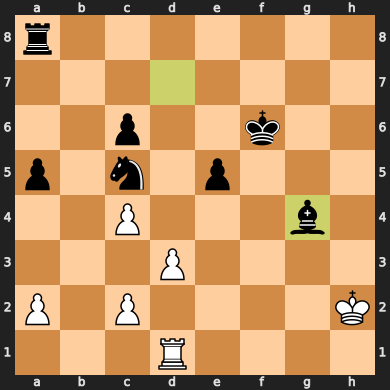

Your Move: d3d4
Best Move: d1f1


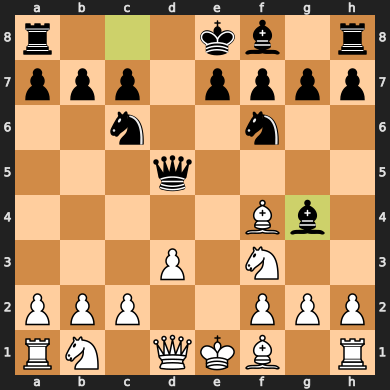

Your Move: f4c7
Best Move: b1c3


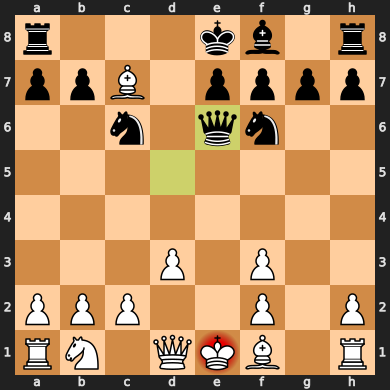

Your Move: f1e2
Best Move: d1e2


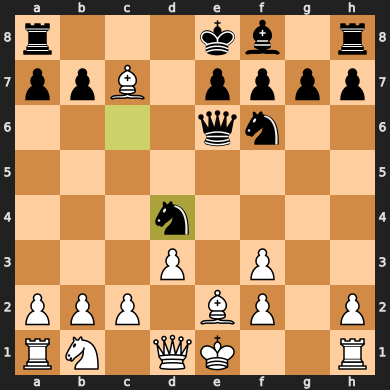

Your Move: b1c3
Best Move: h2h4


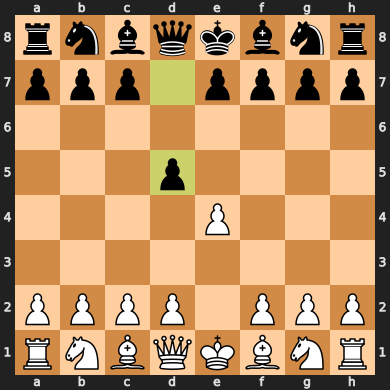

Your Move: b1c3
Best Move: e4d5


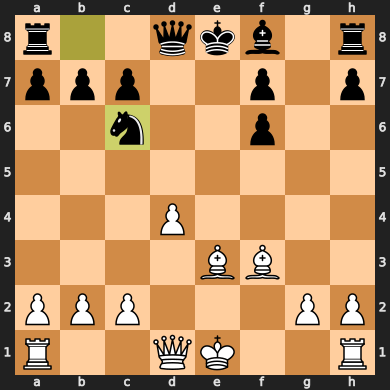

Your Move: d4d5
Best Move: e1g1


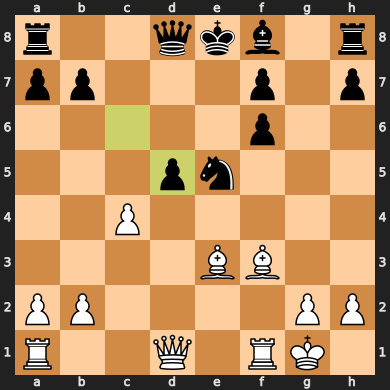

Your Move: c4d5
Best Move: f3d5


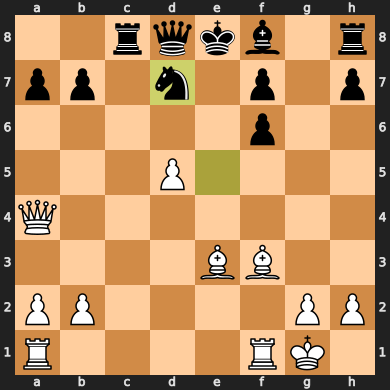

Your Move: a4a7
Best Move: a1e1


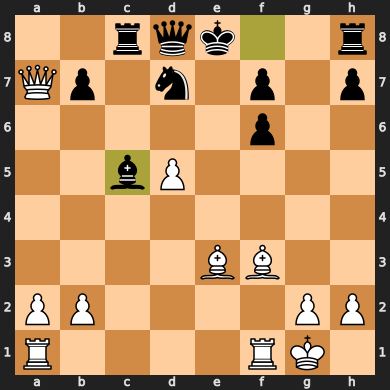

Your Move: a7b7
Best Move: e3c5


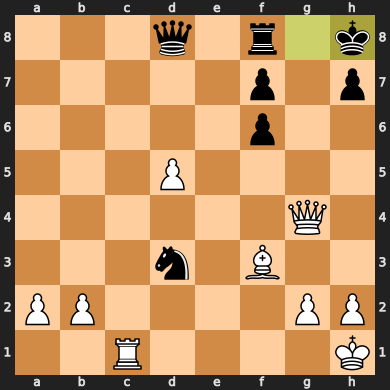

Your Move: c1c2
Best Move: c1f1


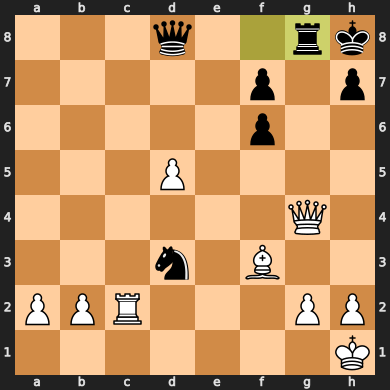

Your Move: g4e4
Best Move: g4h4


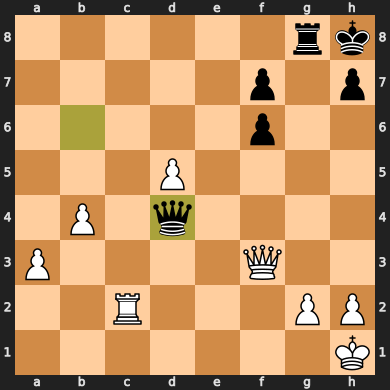

Your Move: c2a2
Best Move: c2c1


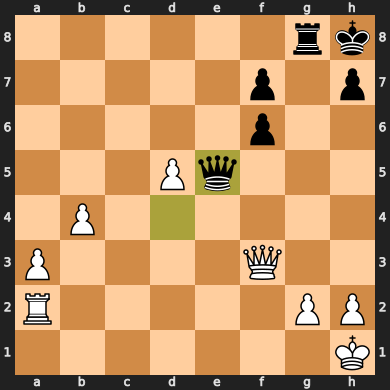

Your Move: f3e2
Best Move: a2f2


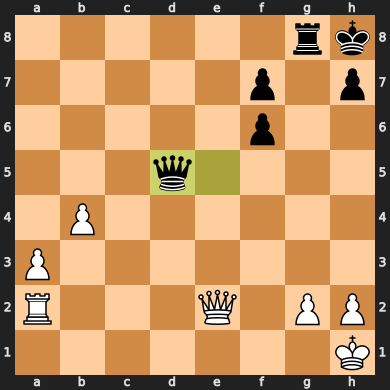

Your Move: a3a4
Best Move: a2a1


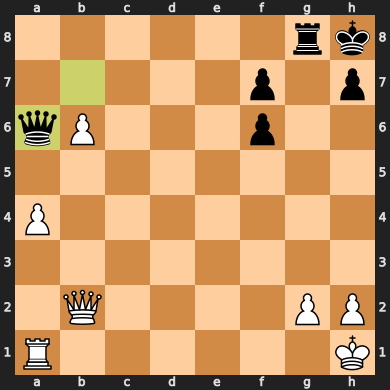

Your Move: b6b7
Best Move: b2f6


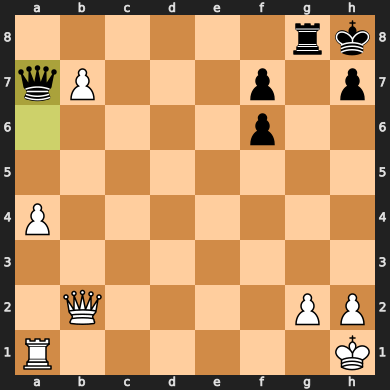

Your Move: a4a5
Best Move: b2f6


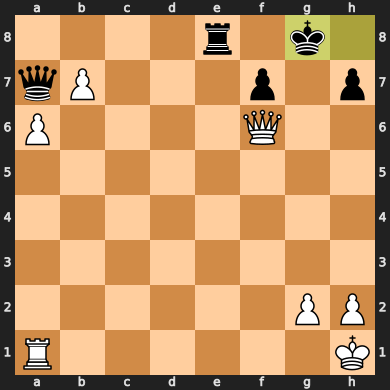

Your Move: f6g5
Best Move: a1f1


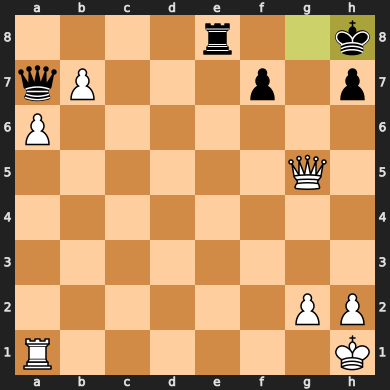

Your Move: g5b5
Best Move: g5b5


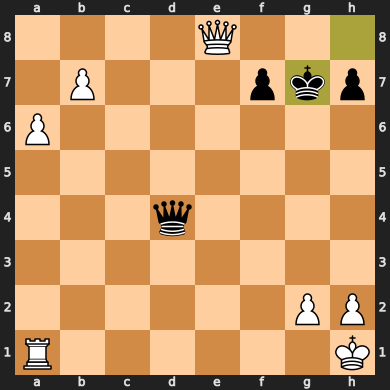

Your Move: b7b8q
Best Move: a1f1


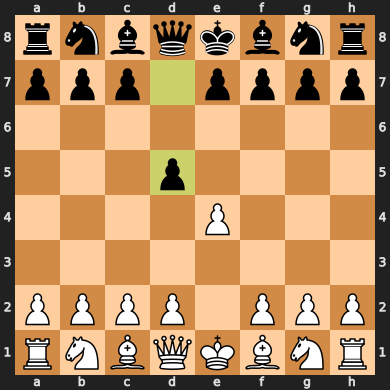

Your Move: b1c3
Best Move: e4d5


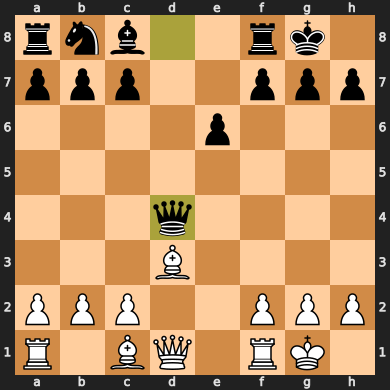

Your Move: d1f3
Best Move: d3h7


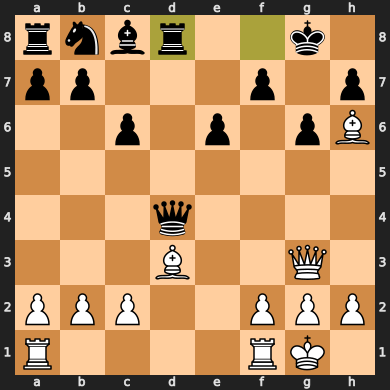

Your Move: h6f4
Best Move: a1d1


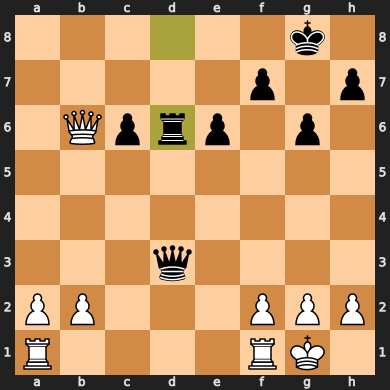

Your Move: a1d1
Best Move: a2a4


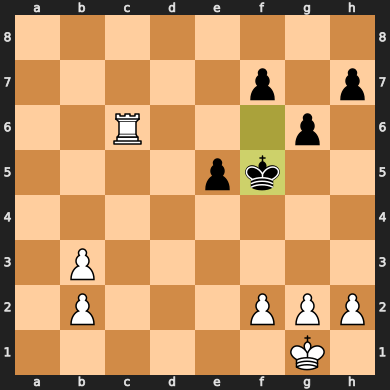

Your Move: c6c7
Best Move: b3b4


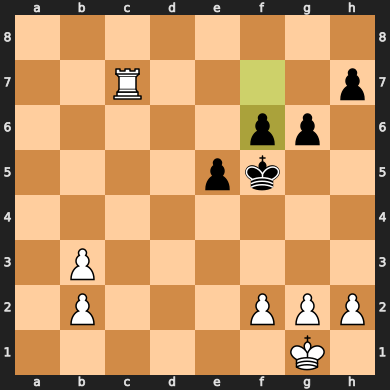

Your Move: c7h7
Best Move: b3b4


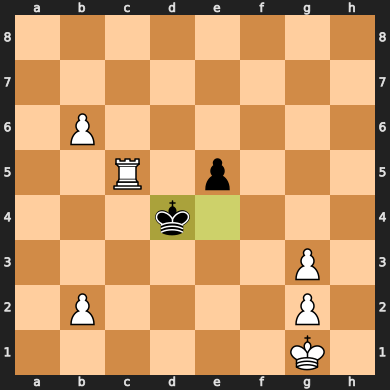

Your Move: c5e5
Best Move: c5c7


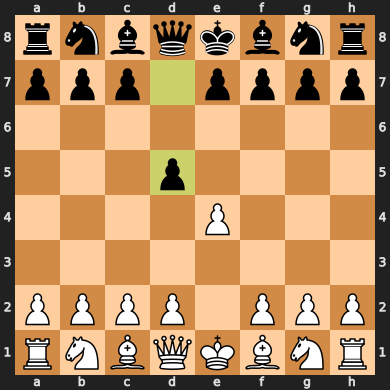

Your Move: b1c3
Best Move: e4d5


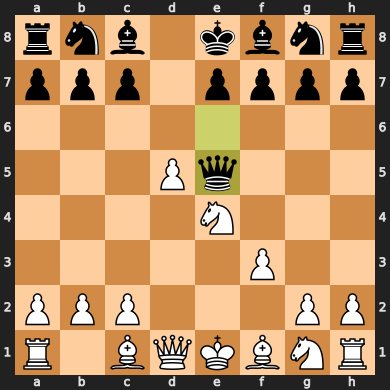

Your Move: f1c4
Best Move: g1e2


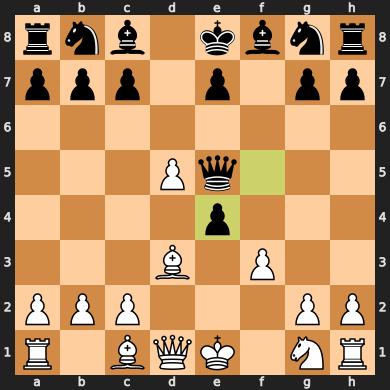

Your Move: d3e4
Best Move: f3e4


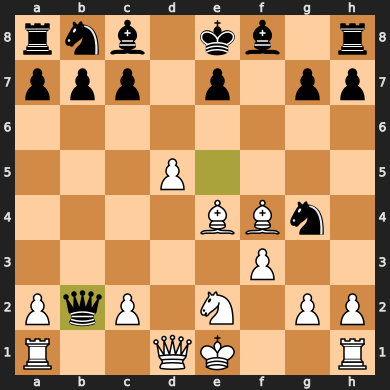

Your Move: f3g4
Best Move: a1b1


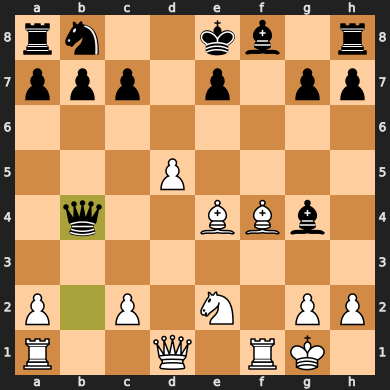

Your Move: e4f3
Best Move: d1d3


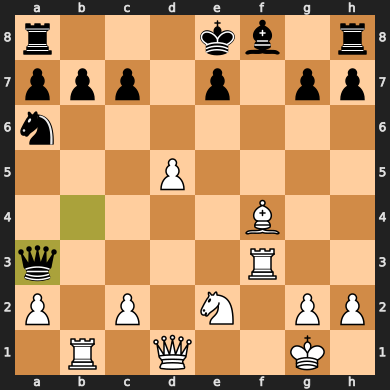

Your Move: b1b7
Best Move: f3a3


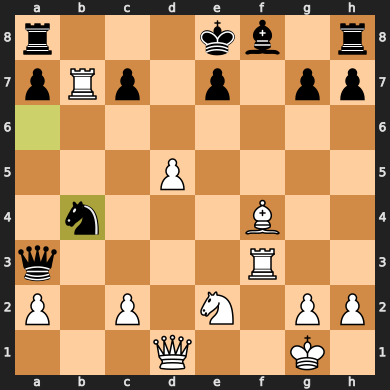

Your Move: f4c7
Best Move: f3a3


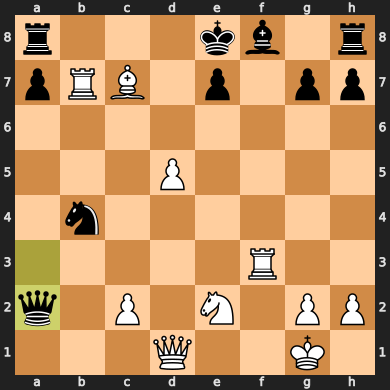

Your Move: f3c3
Best Move: b7b4


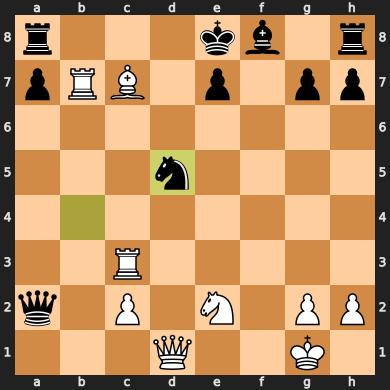

Your Move: b7b4
Best Move: c3b3


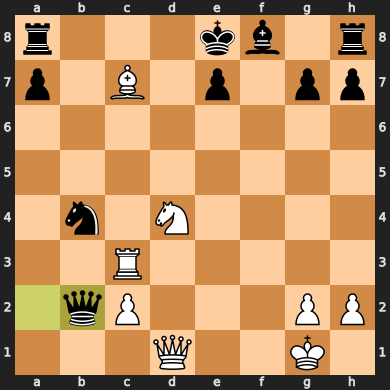

Your Move: c3c5
Best Move: d1h5


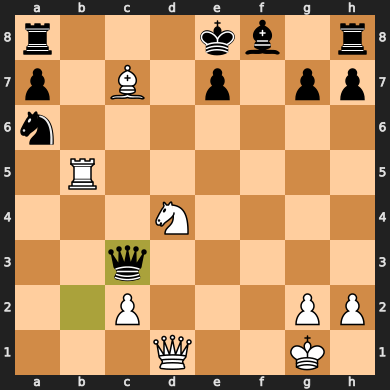

Your Move: d4e6
Best Move: c7e5


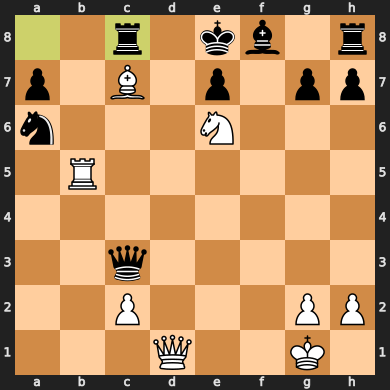

Your Move: b5b7
Best Move: c7f4


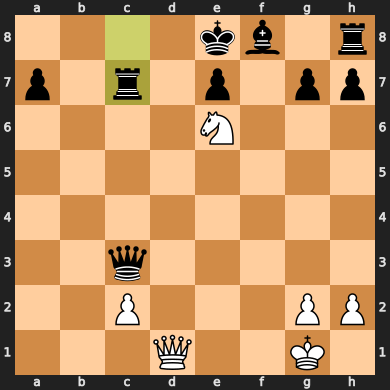

Your Move: d1d8
Best Move: e6c7


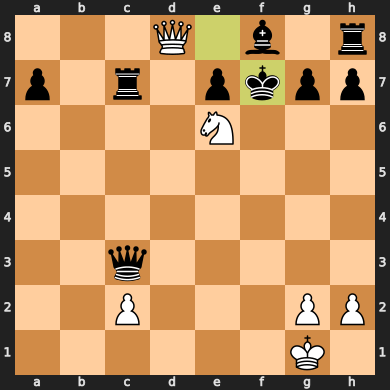

Your Move: e6c7
Best Move: e6g5


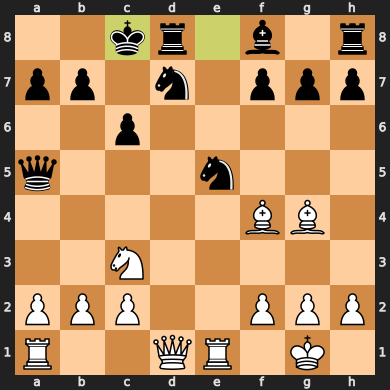

Your Move: d1d4
Best Move: e1e5


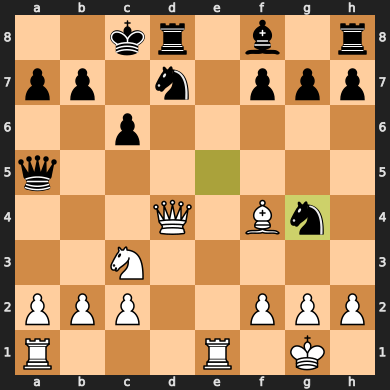

Your Move: f4d2
Best Move: d4e4


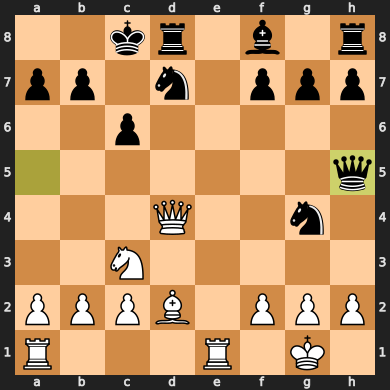

Your Move: f2f3
Best Move: h2h3


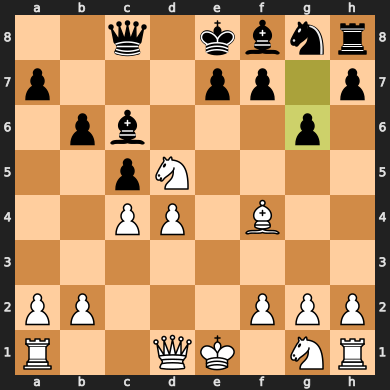

Your Move: f4e5
Best Move: d5c7


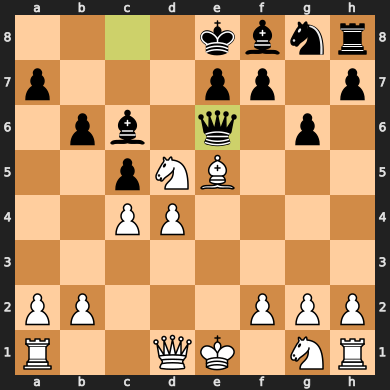

Your Move: g1e2
Best Move: d5c7


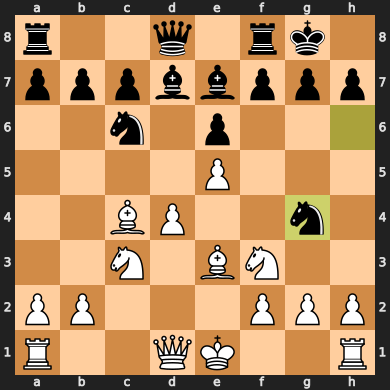

Your Move: d1d2
Best Move: e3d2


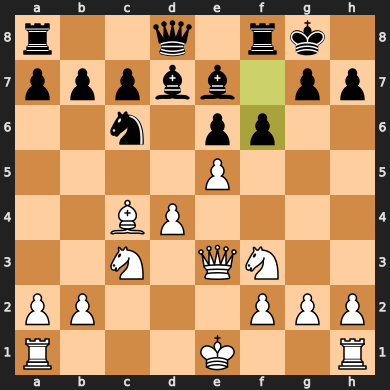

Your Move: d4d5
Best Move: e5f6


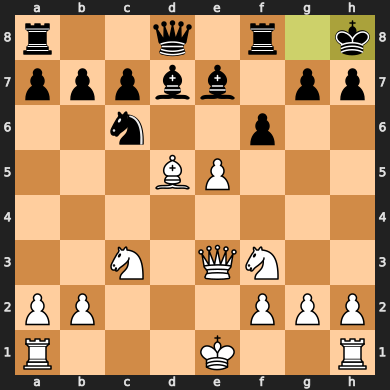

Your Move: e1c1
Best Move: e5e6


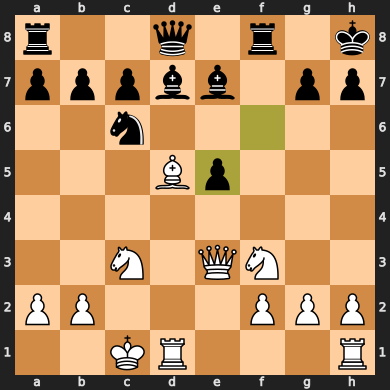

Your Move: f3e5
Best Move: d5c6


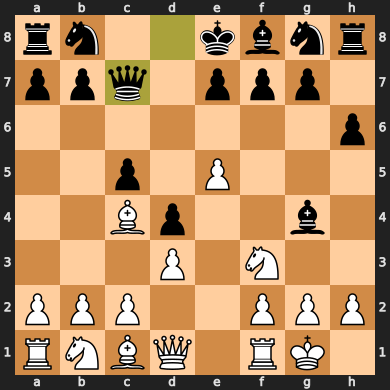

Your Move: c1f4
Best Move: e5e6


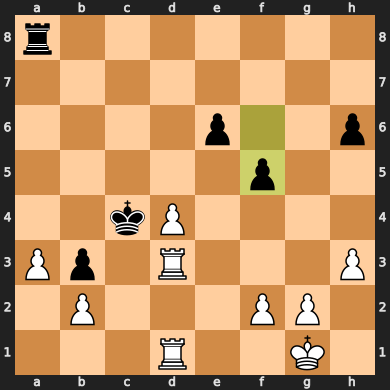

Your Move: f2f4
Best Move: d4d5


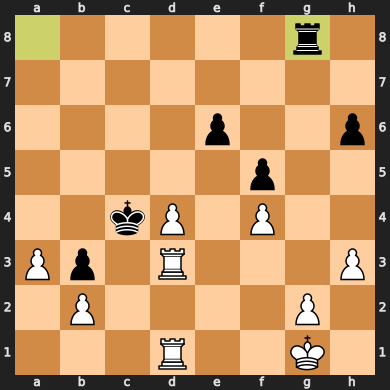

Your Move: g2g3
Best Move: d4d5


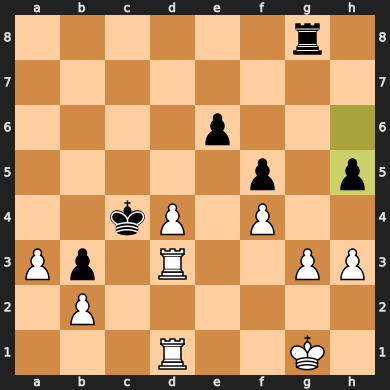

Your Move: h3h4
Best Move: d4d5


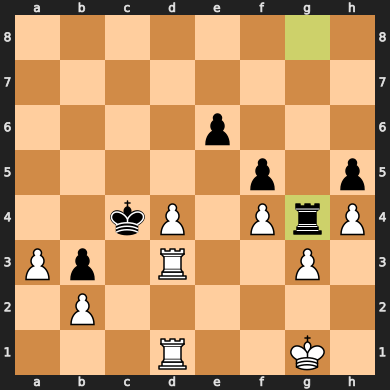

Your Move: a3a4
Best Move: d4d5


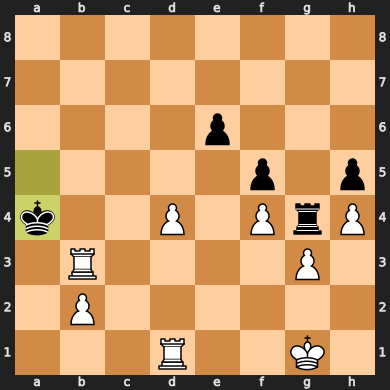

Your Move: b3d3
Best Move: b3b8


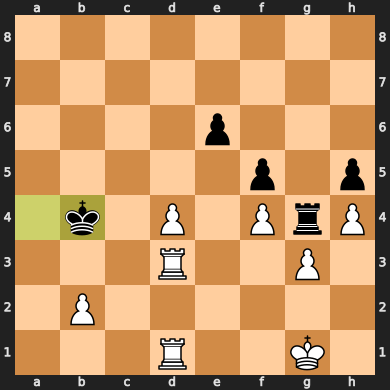

Your Move: b2b3
Best Move: d1c1


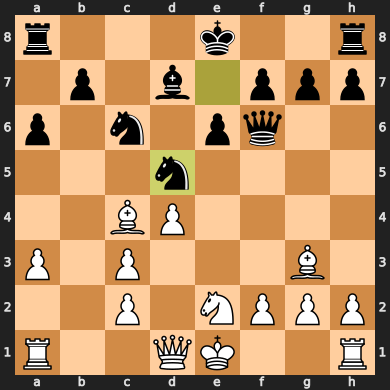

Your Move: g3e5
Best Move: c4a2


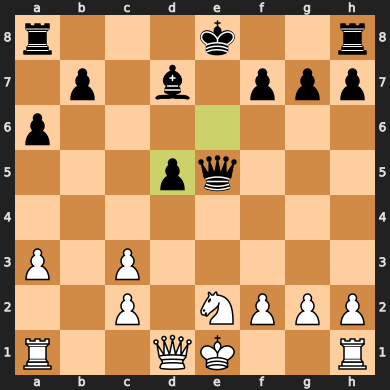

Your Move: f2f4
Best Move: d1d4


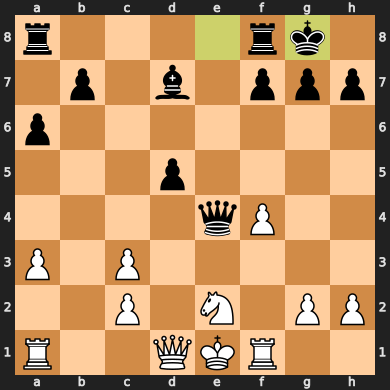

Your Move: a1b1
Best Move: e1f2


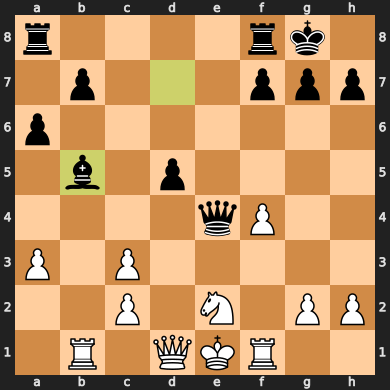

Your Move: e1d2
Best Move: f1f2


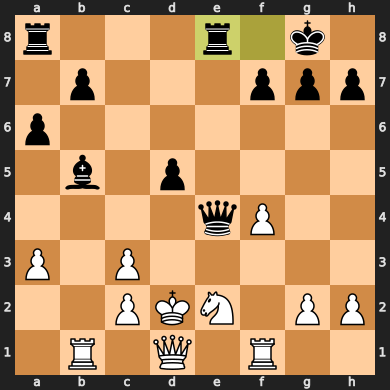

Your Move: b1b4
Best Move: f1f2


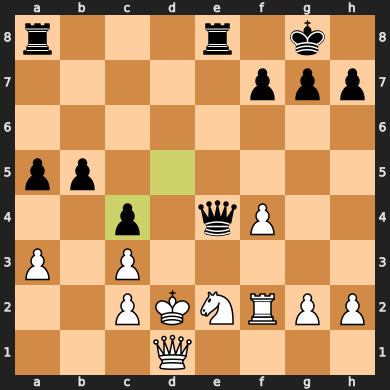

Your Move: e2g3
Best Move: d2e1


In [16]:
engine = chess.engine.SimpleEngine.popen_uci("Datasets/stockfish/stockfish-windows-x86-64-avx2")

for game in white_df_B01['Moves']:
	pgn = StringIO(game)
	game = chess.pgn.read_game(pgn)
	eval = 0
	
	board = chess.Board()

	for number, move in enumerate(game.mainline_moves()): 
		
		board.push(move)
		info = engine.analyse(board, chess.engine.Limit(depth=20))

		score = info["score"].pov(chess.WHITE)
		if type(score) == chess.engine.Cp:
			new_eval = score.score()
		elif type(score) == chess.engine.Mate:
			# new_eval = figure out which direction the mate is in and set it to 10000 or -10000 accordingly
			mate_eval = score.mate()
			if mate_eval == None or mate_eval == 0:
				break
			elif mate_eval > 0:
				new_eval = 10000
			else:
				new_eval = -10000
		else:
			break
		if eval - new_eval >= 100 and number % 2 == 0:
			board.pop()
			info = engine.analyse(board, chess.engine.Limit(depth=20))
			display(board)
			print("Your Move:", move)
			print("Best Move:", info['pv'][0].uci())
			board.push(move)
		eval = new_eval

engine.quit()